In [15]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

In [16]:
df_110= pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415277_pt110-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_110

barcode  is_cell                    contig_id  \
0      AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_1   
1      AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_2   
2      AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_1   
3      AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_2   
4      AAACCTGAGCGCCTTG-1     True  AAACCTGAGCGCCTTG-1_contig_1   
...                   ...      ...                          ...   
13451  TTTGTCAAGTGTACGG-1     True  TTTGTCAAGTGTACGG-1_contig_1   
13452  TTTGTCAAGTTACCCA-1     True  TTTGTCAAGTTACCCA-1_contig_1   
13453  TTTGTCAAGTTACCCA-1     True  TTTGTCAAGTTACCCA-1_contig_2   
13454  TTTGTCAGTCAAAGAT-1     True  TTTGTCAGTCAAAGAT-1_contig_1   
13455  TTTGTCAGTCAAAGAT-1     True  TTTGTCAGTCAAAGAT-1_contig_2   

       high_confidence  length chain      v_gene d_gene   j_gene c_gene  \
0                 True     523   TRA  TRAV14/DV4    NaN   TRAJ26   TRAC   
1                 True     507   TRB    TRBV12-4    NaN  TRBJ1-6  TRBC1   
2                 True     624   TRA       TRAV3    NaN   TRAJ10   TRAC   
3                 True     564   TRB     TRBV7-9  TRBD1  TRBJ1-4  TRBC1   
4                 True     486   TRB      TRBV27    NaN  TRBJ2-2  TRBC2   
...                ...     ...   ...         ...    ...      ...    ...   
13451             True     499   TRB       TRBV9    NaN  TRBJ1-5  TRBC1   
13452             True     550   TRA    TRAV12-2    NaN   TRAJ38   TRAC   
13453             True     500   TRB     TRBV5-1    NaN  TRBJ2-5  TRBC2   
13454             True     536   TRB      TRBV18    NaN  TRBJ2-1  TRBC2   
13455             True     505   TRA  TRAV23/DV6    NaN   TRAJ17   TRAC   

       full_length  productive              cdr3  \
0             True        True    CAMRENNYGQNFVF   
1             True        True   CASSLRTGLNSPLHF   
2             True        True  CAVRDRVTGGGNKLTF   
3             True        True  CASSFSGQGGHEKLFF   
4             True        True      CASAPSTGELFF   
...            ...         ...               ...   
13451         True        True   CASSVGGGSNQPQHF   
13452         True        True   CAVKRDAGNNRKLIW   
13453         True        True    CASSSGGGQETQYF   
13454         True        True   CASSPWTSGDNEQFF   
13455         True        True      CAAKAAGNKLTF   

                                                cdr3_nt  reads  umis  \
0            TGTGCAATGAGAGAGAATAACTATGGTCAGAATTTTGTCTTT   1079     9   
1         TGTGCCAGCAGTTTACGGACAGGGCTAAATTCACCCCTCCACTTT    104     1   
2      TGTGCTGTGAGAGACAGGGTCACGGGAGGAGGAAACAAACTCACCTTT    715     9   
3      TGTGCCAGCAGCTTTTCCGGACAGGGAGGTCATGAAAAACTGTTTTTT   2065    26   
4                  TGTGCCAGCGCCCCATCAACTGGGGAGCTGTTTTTT   2386    30   
...                                                 ...    ...   ...   
13451     TGTGCCAGCAGCGTAGGGGGAGGGAGCAATCAGCCCCAGCATTTT    515     8   
13452     TGTGCCGTGAAGAGGGATGCTGGCAACAACCGTAAGCTGATTTGG   2655    21   
13453        TGCGCCAGCAGCTCGGGGGGCGGGCAAGAGACCCAGTACTTC   1531    22   
13454     TGTGCCAGCTCACCATGGACTAGCGGGGACAATGAGCAGTTCTTC   3133    46   
13455              TGTGCAGCTAAAGCTGCAGGCAACAAGCTAACTTTT   3531    29   

      raw_clonotype_id           raw_consensus_id  
0        clonotype5207  clonotype5207_consensus_2  
1        clonotype5207  clonotype5207_consensus_1  
2        clonotype5681  clonotype5681_consensus_2  
3        clonotype5681  clonotype5681_consensus_1  
4        clonotype1107  clonotype1107_consensus_1  
...                ...                        ...  
13451    clonotype3218  clonotype3218_consensus_1  
13452    clonotype2938  clonotype2938_consensus_2  
13453    clonotype2938  clonotype2938_consensus_1  
13454    clonotype5282  clonotype5282_consensus_1  
13455    clonotype5282  clonotype5282_consensus_2  

[13456 rows x 18 columns]

In [7]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_harmony_genovis.h5ad')
adata

AnnData object with n_obs × n_vars = 77492 × 6770
    obs: 'channel', 'barcode', 'timepoint', 'timepoint_fine', 'product', 'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts', 'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'n_counts', 'leiden_0.9', 'leiden_0.8', 'leiden_0.7', 'leiden_0.6', 'leiden_0.5', 'leiden_0.4', 'leiden_0.3', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'louvain', 'cluster_15', 'cell_type'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'genome-0-1', 'genome-1-1', 'genome-2-1', 'genome-3-1', 'genome-4-1', 'genome-5-1', 'genome-6-1', 'genome-7-1', 'genome-8-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersion

In [9]:
adata.obs.head()

channel   barcode timepoint timepoint_fine  \
AAACCTGAGAAGATTC-1-0-0  Patient01-Infusion  Axi-R-01  Infusion       Infusion   
AAACCTGAGAAGGGTA-1-0-0  Patient01-Infusion  Axi-R-01  Infusion       Infusion   
AAACCTGAGAGCCTAG-1-0-0  Patient01-Infusion  Axi-R-01  Infusion       Infusion   
AAACCTGAGGATCGCA-1-0-0  Patient01-Infusion  Axi-R-01  Infusion       Infusion   
AAACCTGAGTGAATTG-1-0-0  Patient01-Infusion  Axi-R-01  Infusion       Infusion   

                         product  generic  nTisa  nAxi    CAR  \
AAACCTGAGAAGATTC-1-0-0  Yescarta  Axi-cel    0.0   3.0   True   
AAACCTGAGAAGGGTA-1-0-0  Yescarta  Axi-cel    0.0   0.0  False   
AAACCTGAGAGCCTAG-1-0-0  Yescarta  Axi-cel    0.0   0.0  False   
AAACCTGAGGATCGCA-1-0-0  Yescarta  Axi-cel    0.0   0.0  False   
AAACCTGAGTGAATTG-1-0-0  Yescarta  Axi-cel    0.0   3.0   True   

                        n_genes_by_counts  ...  leiden_0.3 leiden_1  \
AAACCTGAGAAGATTC-1-0-0               2051  ...           2        5   
AAACCTGAGAAGGGTA-1-0-0               1034  ...           2        3   
AAACCTGAGAGCCTAG-1-0-0               2175  ...           4        7   
AAACCTGAGGATCGCA-1-0-0               2161  ...           4        7   
AAACCTGAGTGAATTG-1-0-0               2315  ...           2        9   

                       leiden_1.1 leiden_1.2 leiden_1.3 leiden_1.4  \
AAACCTGAGAAGATTC-1-0-0          9         10          8          7   
AAACCTGAGAAGGGTA-1-0-0          2          2          2          2   
AAACCTGAGAGCCTAG-1-0-0          6          6          7          8   
AAACCTGAGGATCGCA-1-0-0          6          6          7          8   
AAACCTGAGTGAATTG-1-0-0          7          7          9          9   

                        leiden_1.5  louvain  cluster_15  cell_type  
AAACCTGAGAAGATTC-1-0-0           7        2          11        CD8  
AAACCTGAGAAGGGTA-1-0-0           2        1           1        CD8  
AAACCTGAGAGCCTAG-1-0-0           8        5          10        CD8  
AAACCTGAGGATCGCA-1-0-0           8        5          10        CD8  
AAACCTGAGTGAATTG-1-0-0           5        1           9        CD8  

[5 rows x 38 columns]

In [14]:
adata.obs['barcode'].value_counts()

barcode
Patient245-D7-CART    15926
Axi-R-03               6709
Axi-R-01               5751
Patient110-D7-CART     5348
Axi-N-14               4654
Patient253-D7-CART     4107
Axi-P-05               3651
Axi-N-09               3568
Patient276-D7-CART     3087
Patient116-D7-CART     3068
Patient125-D7-CART     3029
Patient263-D7-CART     2629
Axi-N-07               2480
Patient282-D7-CART     2227
Axi-R-08               1584
Axi-N-16               1536
Axi-R-02               1359
Axi-R-15               1179
Axi-N-10               1135
Axi-N-18                920
Axi-R-17                731
Axi-N-06                690
Axi-R-04                682
Axi-R-12                435
Patient129-D7-CART      349
Axi-R-11                318
Axi-R-19                238
Axi-R-13                102
Name: count, dtype: int64

In [17]:
import pandas as pd

# Load the dataframes
df_110 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415277_pt110-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_110['patient'] = 'Patient110-D7-CART'
df_116 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415279_pt116-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_116['patient'] = 'Patient116-D7-CART'
df_125 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415281_pt125-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_125['patient'] = 'Patient125-D7-CART'
df_129 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415283_pt129-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_129['patient'] = 'Patient129-D7-CART'
df_245 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415285_pt245-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_245['patient'] = 'Patient245-D7-CART'
df_253 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415287_pt253-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_253['patient'] = 'Patient253-D7-CART'
df_263 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415289_pt263-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_263['patient'] = 'Patient263-D7-CART'
df_276 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415291_pt276-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_276['patient'] = 'Patient276-D7-CART'
df_282 = pd.read_csv('/home/emma/data/CART/TCR seq/GSM6415293_pt282-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_282['patient'] = 'Patient282-D7-CART'
# Add more dataframes as necessary
# Concatenate the dataframes
df_combined = pd.concat([df_110, df_116, df_125, df_129, df_245, df_253, df_263, df_276, df_282], axis=0, ignore_index=True)
df_combined.to_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv', index=False)

df_combined


barcode  is_cell                    contig_id  \
0      AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_1   
1      AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_2   
2      AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_1   
3      AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_2   
4      AAACCTGAGCGCCTTG-1     True  AAACCTGAGCGCCTTG-1_contig_1   
...                   ...      ...                          ...   
95943  TTTGTCAGTGGGTCAA-1     True  TTTGTCAGTGGGTCAA-1_contig_2   
95944  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_1   
95945  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_2   
95946  TTTGTCATCTTCATGT-1     True  TTTGTCATCTTCATGT-1_contig_1   
95947  TTTGTCATCTTCATGT-1     True  TTTGTCATCTTCATGT-1_contig_2   

       high_confidence  length chain      v_gene d_gene   j_gene c_gene  ...  \
0                 True     523   TRA  TRAV14/DV4    NaN   TRAJ26   TRAC  ...   
1                 True     507   TRB    TRBV12-4    NaN  TRBJ1-6  TRBC1  ...   
2                 True     624   TRA       TRAV3    NaN   TRAJ10   TRAC  ...   
3                 True     564   TRB     TRBV7-9  TRBD1  TRBJ1-4  TRBC1  ...   
4                 True     486   TRB      TRBV27    NaN  TRBJ2-2  TRBC2  ...   
...                ...     ...   ...         ...    ...      ...    ...  ...   
95943             True     505   TRA  TRAV29/DV5    NaN   TRAJ49   TRAC  ...   
95944             True     516   TRB    TRBV12-4    NaN  TRBJ2-6  TRBC2  ...   
95945             True     489   TRA    TRAV12-3    NaN   TRAJ54   TRAC  ...   
95946             True     677   TRB     TRBV5-6  TRBD1  TRBJ2-1  TRBC2  ...   
95947             True     562   TRA      TRAV19    NaN   TRAJ29   TRAC  ...   

                     cdr1_nt               fwr2  \
0                        NaN                NaN   
1                        NaN                NaN   
2                        NaN                NaN   
3                        NaN                NaN   
4                        NaN                NaN   
...                      ...                ...   
95943     AACAGCATGTTTGATTAT  FLWYKKYPAEGPTFLIS   
95944        TCAGGACACGACTAC  LFWYRQTMMRGLELLIY   
95945     AACAGTGCTTTTCAATAC  FMWYRQYSRKGPELLMY   
95946        TCTGGGCATGACACT  VSWYQQALGQGPQFIFQ   
95947  ACCCGTGATACTACTTATTAC  LFWYKQPPSGELVFLIR   

                                                 fwr2_nt      cdr2  \
0                                                    NaN       NaN   
1                                                    NaN       NaN   
2                                                    NaN       NaN   
3                                                    NaN       NaN   
4                                                    NaN       NaN   
...                                                  ...       ...   
95943  TTCCTATGGTACAAAAAATACCCTGCTGAAGGTCCTACATTCCTGA...   ISSIKDK   
95944  CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...    FNNNVP   
95945  TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...    TYSSGN   
95946  GTGTCCTGGTACCAACAGGCCCTGGGTCAGGGGCCCCAGTTTATCT...    YYEEEE   
95947  TTATTCTGGTACAAGCAACCACCAAGTGGAGAATTGGTTTTCCTTA...  RNSFDEQN   

                        cdr2_nt                                   fwr3  \
0                           NaN                                    NaN   
1                           NaN                                    NaN   
2                           NaN                                    NaN   
3                           NaN                                    NaN   
4                           NaN                                    NaN   
...                         ...                                    ...   
95943     ATAAGTTCCATTAAGGATAAA      NEDGRFTVFLNKSAKHLSLHIVPSQPGDSAVYF   
95944        TTTAACAACAACGTTCCG  IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF   
95945        ACATACTCCAGTGGTAAC      KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL   
95946        TATTATGAGGAGGAAGAG   RQRGNFPDRFSGHQFPNYSSELNV

In [10]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['organization'] == 'Stanford']
print(adata.shape[0])
tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')

39770


/tmp/ipykernel_1010955/3142430486.py:9: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')


In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

# Load the AnnData object
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')

# Filter for Stanford organization
adata = adata[adata.obs['organization'] == 'Stanford']
print(f"Number of Stanford cells: {adata.shape[0]}")

# Load TCR metadata
tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')

# Calculate the CDR3 length from the 'cdr3' column
tcr_meta['cdr3_length'] = tcr_meta['cdr3'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Truncate barcodes to the first 16 characters in both datasets
tcr_meta['short_barcode'] = tcr_meta['barcode'].str[:16]
adata.obs['short_barcode'] = adata.obs_names.str[:16]

# Get the list of barcodes in adata
barcodes_in_adata = adata.obs['short_barcode'].unique() 

# Filter tcr_meta to include only barcodes that are in adata
tcr_meta_filtered = tcr_meta[tcr_meta['short_barcode'].isin(barcodes_in_adata)].copy()
print(tcr_meta_filtered.head(5))
# Aggregate clonotype information per cell and ensure all values are strings
tcr_aggregated = tcr_meta_filtered.groupby('short_barcode').agg({
    'chain': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'v_gene': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'cdr3': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'cdr3_length': 'mean',
    'exact_subclonotype_id': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'raw_clonotype_id': lambda x: ';'.join(x.dropna().astype(str).unique()),  # Include this line
}).reset_index()
print(tcr_aggregated.head(5))
# Rename 'raw_clonotype_id' to 'tcr_clonotype'
tcr_aggregated.rename(columns={'raw_clonotype_id': 'tcr_clonotype'}, inplace=True)

# Merge TCR data with adata.obs
adata.obs = adata.obs.merge(tcr_aggregated, on='short_barcode', how='left')
print(adata.obs.columns)  # Check if 'tcr_clonotype' is now in the DataFrame

# Save the modified AnnData object
adata.write_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')

print("TCR metadata successfully merged and AnnData object saved.")

Number of Stanford cells: 39770


/tmp/ipykernel_12185/1151266405.py:14: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')
/tmp/ipykernel_12185/1151266405.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['short_barcode'] = adata.obs_names.str[:16]


              barcode  is_cell                    contig_id  high_confidence  \
0  AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_1             True   
1  AAACCTGAGACCACGA-1     True  AAACCTGAGACCACGA-1_contig_2             True   
2  AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_1             True   
3  AAACCTGAGAGCTGGT-1     True  AAACCTGAGAGCTGGT-1_contig_2             True   
4  AAACCTGAGCGCCTTG-1     True  AAACCTGAGCGCCTTG-1_contig_1             True   

   length chain      v_gene d_gene   j_gene c_gene  ...  fwr2_nt  cdr2  \
0     523   TRA  TRAV14/DV4    NaN   TRAJ26   TRAC  ...      NaN   NaN   
1     507   TRB    TRBV12-4    NaN  TRBJ1-6  TRBC1  ...      NaN   NaN   
2     624   TRA       TRAV3    NaN   TRAJ10   TRAC  ...      NaN   NaN   
3     564   TRB     TRBV7-9  TRBD1  TRBJ1-4  TRBC1  ...      NaN   NaN   
4     486   TRB      TRBV27    NaN  TRBJ2-2  TRBC2  ...      NaN   NaN   

  cdr2_nt fwr3  fwr3_nt  fwr4 fwr4_nt exact_subclonotype_id cdr3_length  \

In [7]:
print(adata.obs[['chain', 'v_gene', 'cdr3', 'cdr3_length', 'exact_subclonotype_id', 'tcr_clonotype']].head())

     chain               v_gene                               cdr3  \
0  TRA;TRB  TRAV14/DV4;TRBV12-4     CAMRENNYGQNFVF;CASSLRTGLNSPLHF   
1  TRA;TRB        TRAV3;TRBV7-9  CAVRDRVTGGGNKLTF;CASSFSGQGGHEKLFF   
2  TRB;TRA         TRBV27;TRAV6          CASAPSTGELFF;CALRGGADGLTF   
3  TRB;TRA     TRBV6-2;TRAV26-1       CASRSTAFYGYTF;CIVRGGEGAQKLVF   
4  TRA;TRB     TRAV9-2;TRBV11-3        CARNDYKLSF;CASSQLGEGPYNEQFF   

   cdr3_length exact_subclonotype_id  tcr_clonotype  
0         14.5                        clonotype5207  
1         16.0                        clonotype5681  
2         12.0                        clonotype1107  
3         13.5                        clonotype1205  
4         13.0                        clonotype5394  


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


25% quantile of JUND expression in CR and NR patients: 0.0022424231509119187
Number of cells before subsetting: 23147
Number of cells after subsetting: 19826


/tmp/ipykernel_1402279/3586928675.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


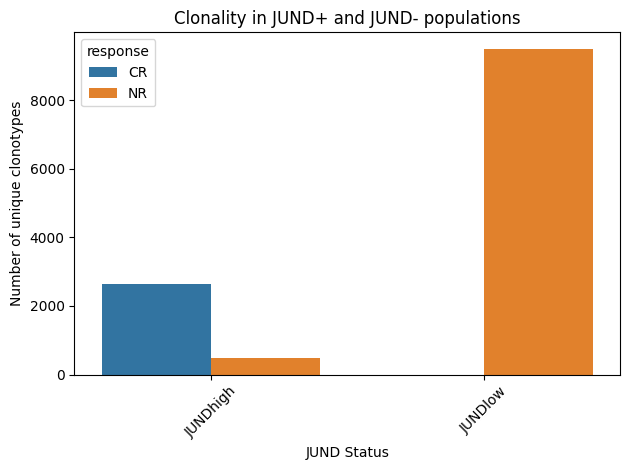

/tmp/ipykernel_1402279/3586928675.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(


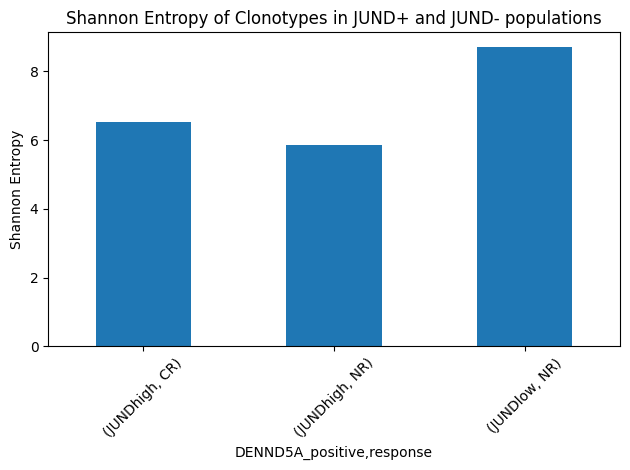

/tmp/ipykernel_1402279/3586928675.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  v_gene_counts = adata_combat_CR_NR.obs.groupby(


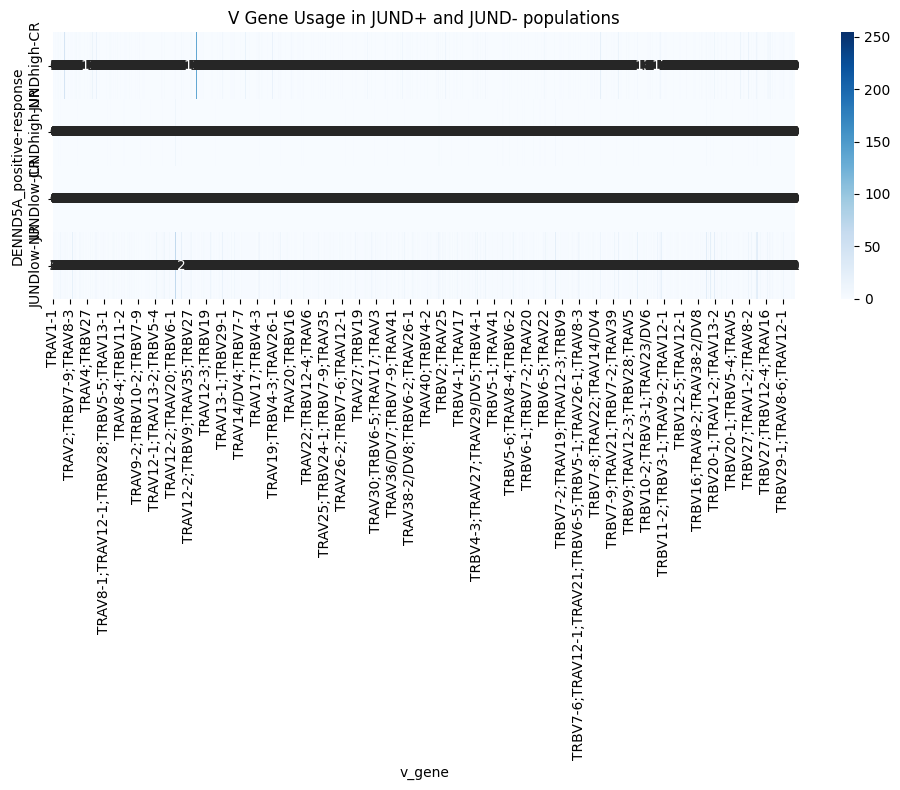

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


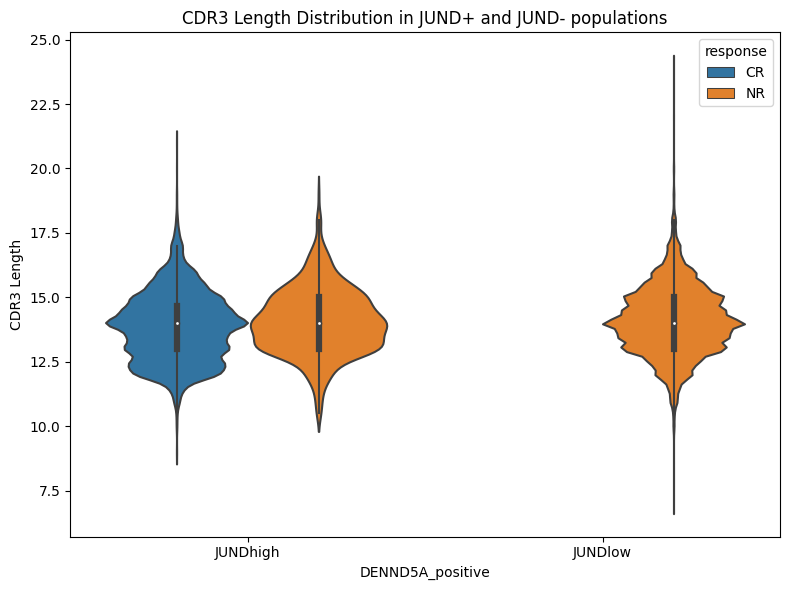

In [6]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load data and subset for CD4 cells and CR/NR responses
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD4'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify JUND+ and JUND- populations using log-transformed data
primary_gene = "FCER1G" & "ZNF683"
gene_expression_CR_NR = (
    adata_combat_CR_NR[:, primary_gene].X.toarray().flatten()
    if issparse(adata_combat_CR_NR.X)
    else adata_combat_CR_NR[:, primary_gene].X.flatten()
)
mask_jund_positive_25perct = np.quantile(gene_expression_CR_NR, 0.25)
print(f"25% quantile of JUND expression in CR and NR patients: {mask_jund_positive_25perct}")

# Apply this threshold to label cells as JUND+ and JUND-
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = np.where(
    gene_expression_CR_NR > mask_jund_positive_25perct, 'JUNDhigh', 'JUNDlow'
)
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')


# Count the number of unique clonotypes in JUND+ and JUND- populations
jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
jund_clonotypes_df = jund_clonotypes.reset_index()

# Now plot the data using the flattened DataFrame
sns.barplot(x=jund_clonotypes_df[f'{primary_gene}_positive'], 
            y=jund_clonotypes_df['tcr_clonotype'], 
            hue=jund_clonotypes_df['response'])

plt.title('Clonality in JUND+ and JUND- populations')
plt.xlabel('JUND Status')
plt.ylabel('Number of unique clonotypes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()
    return entropy(clonotype_counts)

# Calculate Shannon entropy for JUND+ and JUND- populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene}_positive', 'response']
).apply(calculate_shannon_entropy)

# Plot Shannon entropy
shannon_entropy.plot(kind='bar', title='Shannon Entropy of Clonotypes in JUND+ and JUND- populations')
plt.ylabel('Shannon Entropy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate V gene frequency in JUND+ and JUND- cells
v_gene_counts = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene}_positive', 'response', 'v_gene']
).size().unstack(fill_value=0)

# Plot heatmap for V gene usage
plt.figure(figsize=(10, 8))
sns.heatmap(v_gene_counts, cmap='Blues', annot=True, fmt='d')
plt.title('V Gene Usage in JUND+ and JUND- populations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Violin plot for CDR3 length distribution in JUND+ and JUND- populations
plt.figure(figsize=(8, 6))
sns.violinplot(
    x=f'{primary_gene}_positive',
    y='cdr3_length',
    hue='response',
    data=adata_combat_CR_NR.obs
)
plt.title('CDR3 Length Distribution in JUND+ and JUND- populations')
plt.ylabel('CDR3 Length')
plt.tight_layout()
plt.show()

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells before subsetting: 16623
Number of cells after subsetting: 14760


/tmp/ipykernel_15446/3075120135.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_15446/3075120135.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


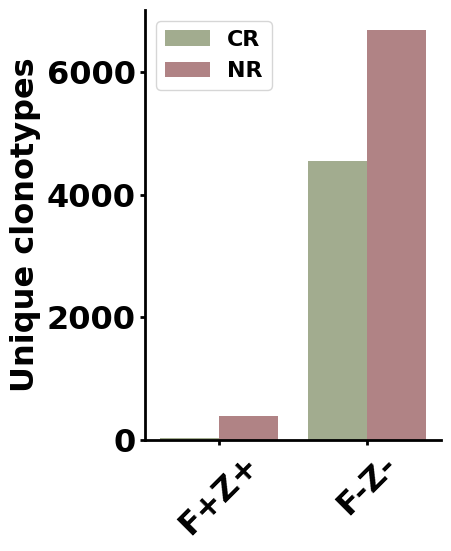

/tmp/ipykernel_15446/3075120135.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


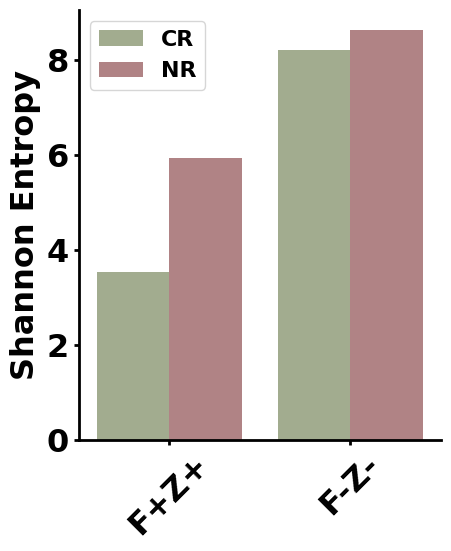

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


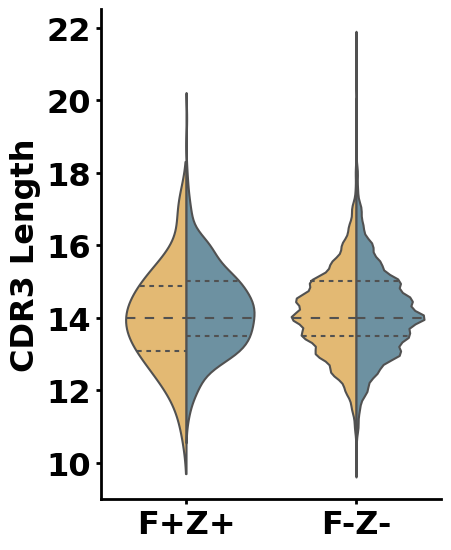

In [59]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load log-transformed dataset
adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD4'].copy()
adata_log_CR_NR = adata_log_CD4[adata_log_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load combat-corrected dataset for counts
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD4'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify JUND+ and ZNF683+ populations using log-transformed data
# Define primary genes for population classification
primary_gene_1 = "FCER1G"
primary_gene_2 = "ZNF683"

# Extract expression data for primary genes from adata_log_CR_NR
JUND_log = adata_log_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_log = adata_log_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_2].X.flatten()

# Define positive as expression >0
mask_JUND_positive = JUND_log > 0
mask_ZNF683_positive = ZNF683_log > 0
mask_JhZh = mask_JUND_positive & mask_ZNF683_positive

# Assign 'J+Z+' or 'J-Z-' based on mask to adata_combat_CR_NR
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_JhZh, 'F+Z+', 'F-Z-')
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')


# Count the number of unique clonotypes in JUND+ and JUND- populations
jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
jund_clonotypes_df = jund_clonotypes.reset_index()

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 23
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
# Now plot the data using the flattened DataFrame
plt.figure(figsize=(5, 6))
sns.barplot(x=jund_clonotypes_df[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=jund_clonotypes_df['tcr_clonotype'], 
            hue=jund_clonotypes_df['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Changed the color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customizing the legend to be smaller
plt.legend(title='', loc='upper left', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Unique clonotypes')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Remove the legend and customize the plot
plt.tight_layout()

# Display the plot
plt.show()


# Function to calculate Shannon entropy
# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()  # Use TCR_clonotypes instead of tcr_clonotype
    return entropy(clonotype_counts)

# Calculate Shannon entropy for JUND+ and JUND- populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response']
).apply(calculate_shannon_entropy).reset_index(name='Shannon_entropy')

# Plot Shannon entropy using the same format as the clonotype plot
plt.figure(figsize=(5, 6))
sns.barplot(x=shannon_entropy[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=shannon_entropy['Shannon_entropy'], 
            hue=shannon_entropy['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Using the same color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customizing the legend to be smaller
plt.legend(title='', loc='upper left', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Shannon Entropy')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# plt.rcParams['axes.linewidth'] = 1
# # Calculate V gene frequency in JUND+ and JUND- cells
# v_gene_counts = adata_combat_CR_NR.obs.groupby(
#     [f'{primary_gene_1}_{primary_gene_2}_positive', 'response', 'v_gene']
# ).size().unstack(fill_value=0)

# # Plot heatmap for V gene usage
# plt.figure(figsize=(10, 8))
# # Adjust the heatmap parameters for better readability and style consistency
# sns.heatmap(v_gene_counts, cmap='Blues', annot=True, fmt='d', cbar_kws={'shrink': 1})  # Shrink color bar

# # Customizing the title and labels
# plt.title('V Gene Usage in JUND+ and JUND- Populations', fontsize=18)  # Adjust title font size
# plt.xticks(rotation=90, fontsize='small')  # Rotate and adjust font size for x-axis labels
# plt.yticks(fontsize='small')  # Adjust font size for y-axis labels
# plt.tight_layout()

# # Display the plot
# plt.show()


# Violin plot for CDR3 length distribution in JUND+ and JUND- populations
plt.figure(figsize=(5, 6))

# Creating the violin plot using the same format as the example you provided
sns.violinplot(
    x=f'{primary_gene_1}_{primary_gene_2}_positive',
    y='cdr3_length',
    hue='response',
    data=adata_combat_CR_NR.obs,
    split=True,  # Splitting by response
    inner="quart",  # Show quartiles inside the violin
    palette=["#F6BD60", '#6494AA'],  # Using the same color palette
    #order=category_order  # Assuming category_order is defined earlier
)

sns.despine()  # Remove the top and right spines

# Remove the legend and customize the plot
plt.legend([], [], frameon=False)  # Removing the legend
plt.title('')  # Removing the title
plt.xlabel('')  # Removing the x-label
plt.ylabel('CDR3 Length')  # Custom ylabel for the violin plot
plt.tight_layout()

# Display the plot
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells before subsetting: 23147
Number of cells after subsetting: 19826


/tmp/ipykernel_18512/2395506465.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_18512/2395506465.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


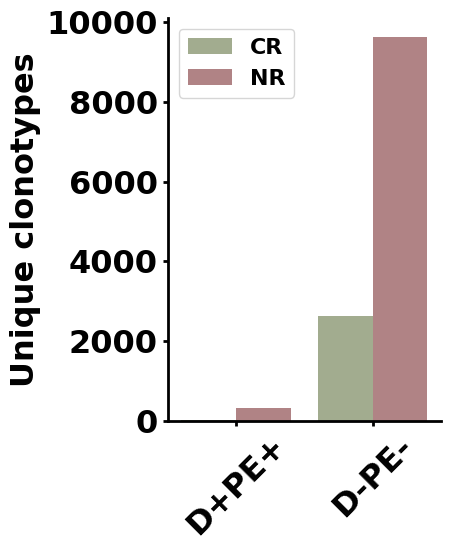

/tmp/ipykernel_18512/2395506465.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


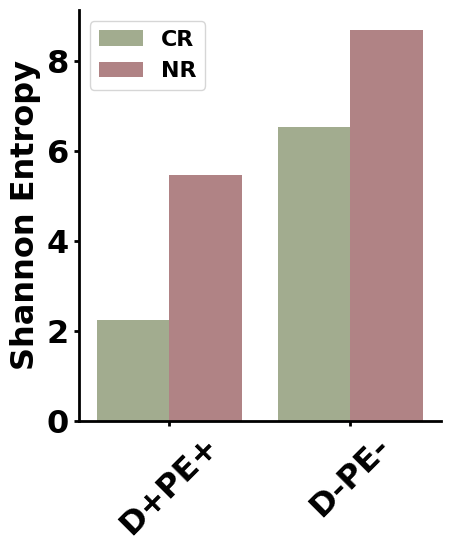

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


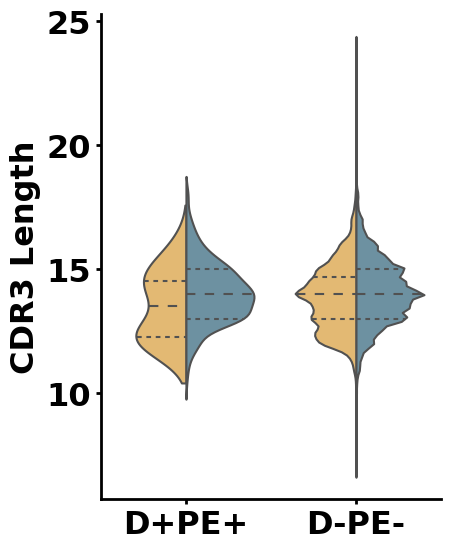

In [6]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load log-transformed dataset
adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD8'].copy()
adata_log_CR_NR = adata_log_CD4[adata_log_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load combat-corrected dataset for counts
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify JUND+ and ZNF683+ populations using log-transformed data
# Define primary genes for population classification
primary_gene_1 = "DENND5A"
primary_gene_2 = "PECAM1"

# Extract expression data for primary genes from adata_log_CR_NR
JUND_log = adata_log_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_log = adata_log_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_2].X.flatten()

# Define positive as expression >0
mask_JUND_positive = JUND_log > 0
mask_ZNF683_positive = ZNF683_log > 0
mask_JhZh = mask_JUND_positive & mask_ZNF683_positive

# Assign 'J+Z+' or 'J-Z-' based on mask to adata_combat_CR_NR
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_JhZh, 'D+PE+', 'D-PE-')
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')


# Count the number of unique clonotypes in JUND+ and JUND- populations
jund_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
jund_clonotypes_df = jund_clonotypes.reset_index()

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 23
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
# Now plot the data using the flattened DataFrame
plt.figure(figsize=(5, 6))
sns.barplot(x=jund_clonotypes_df[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=jund_clonotypes_df['tcr_clonotype'], 
            hue=jund_clonotypes_df['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Changed the color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customizing the legend to be smaller
plt.legend(title='', loc='upper left', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Unique clonotypes')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Remove the legend and customize the plot
plt.tight_layout()

# Display the plot
plt.show()


# Function to calculate Shannon entropy
# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()  # Use TCR_clonotypes instead of tcr_clonotype
    return entropy(clonotype_counts)

# Calculate Shannon entropy for JUND+ and JUND- populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response']
).apply(calculate_shannon_entropy).reset_index(name='Shannon_entropy')

# Plot Shannon entropy using the same format as the clonotype plot
plt.figure(figsize=(5, 6))
sns.barplot(x=shannon_entropy[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=shannon_entropy['Shannon_entropy'], 
            hue=shannon_entropy['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Using the same color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customizing the legend to be smaller
plt.legend(title='', loc='upper left', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Shannon Entropy')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# plt.rcParams['axes.linewidth'] = 1
# # Calculate V gene frequency in JUND+ and JUND- cells
# v_gene_counts = adata_combat_CR_NR.obs.groupby(
#     [f'{primary_gene_1}_{primary_gene_2}_positive', 'response', 'v_gene']
# ).size().unstack(fill_value=0)

# # Plot heatmap for V gene usage
# plt.figure(figsize=(10, 8))
# # Adjust the heatmap parameters for better readability and style consistency
# sns.heatmap(v_gene_counts, cmap='Blues', annot=True, fmt='d', cbar_kws={'shrink': 1})  # Shrink color bar

# # Customizing the title and labels
# plt.title('V Gene Usage in JUND+ and JUND- Populations', fontsize=18)  # Adjust title font size
# plt.xticks(rotation=90, fontsize='small')  # Rotate and adjust font size for x-axis labels
# plt.yticks(fontsize='small')  # Adjust font size for y-axis labels
# plt.tight_layout()

# # Display the plot
# plt.show()


# Violin plot for CDR3 length distribution in JUND+ and JUND- populations
plt.figure(figsize=(5, 6))

# Creating the violin plot using the same format as the example you provided
sns.violinplot(
    x=f'{primary_gene_1}_{primary_gene_2}_positive',
    y='cdr3_length',
    hue='response',
    data=adata_combat_CR_NR.obs,
    split=True,  # Splitting by response
    inner="quart",  # Show quartiles inside the violin
    palette=["#F6BD60", '#6494AA'],  # Using the same color palette
    #order=category_order  # Assuming category_order is defined earlier
)

sns.despine()  # Remove the top and right spines

# Remove the legend and customize the plot
plt.legend([], [], frameon=False)  # Removing the legend
plt.title('')  # Removing the title
plt.xlabel('')  # Removing the x-label
plt.ylabel('CDR3 Length')  # Custom ylabel for the violin plot
plt.tight_layout()

# Display the plot
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells before subsetting: 23147
Number of cells after subsetting: 19826


/tmp/ipykernel_57784/1776731369.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cd81_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


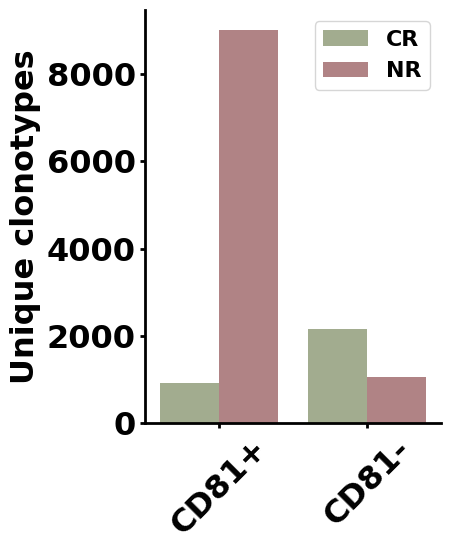

/tmp/ipykernel_57784/1776731369.py:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


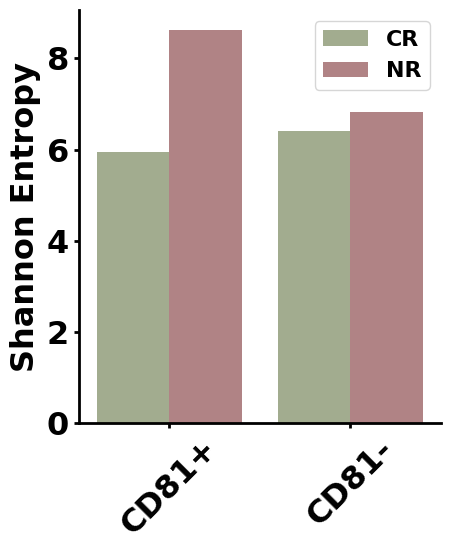

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


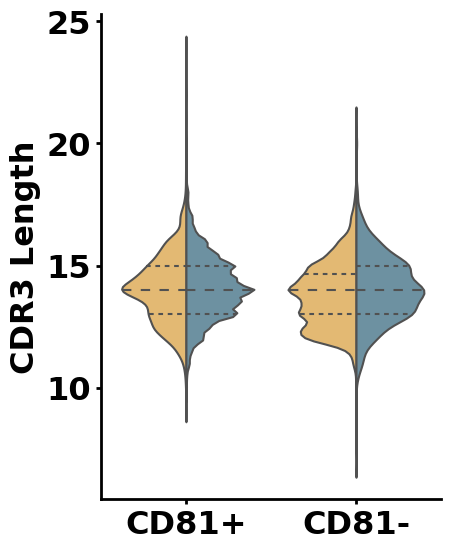

In [11]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load log-transformed dataset
adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD8'].copy()
adata_log_CR_NR = adata_log_CD4[adata_log_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load combat-corrected dataset for counts
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Define CD81 as the primary gene for analysis
primary_gene = "CD81"

# Extract expression data for CD81 from adata_log_CR_NR
CD81_log = adata_log_CR_NR[:, primary_gene].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene].X.flatten()

# Define positive as expression > 0
mask_CD81_positive = CD81_log > 0

# Assign 'CD81+' or 'CD81-' based on mask to adata_combat_CR_NR
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = np.where(mask_CD81_positive, 'CD81+', 'CD81-')
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')


# Count the number of unique clonotypes in CD81+ and CD81- populations
cd81_clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
cd81_clonotypes_df = cd81_clonotypes.reset_index()

# Customize plotting parameters
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 23
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

# Now plot the data using the flattened DataFrame
plt.figure(figsize=(5, 6))
sns.barplot(x=cd81_clonotypes_df[f'{primary_gene}_positive'], 
            y=cd81_clonotypes_df['tcr_clonotype'], 
            hue=cd81_clonotypes_df['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Changed the color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customize the legend and labels
plt.legend(title='', loc='upper right', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Unique clonotypes')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()
    return entropy(clonotype_counts)

# Calculate Shannon entropy for CD81+ and CD81- populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene}_positive', 'response']
).apply(calculate_shannon_entropy).reset_index(name='Shannon_entropy')

# Plot Shannon entropy using the same format as the clonotype plot
plt.figure(figsize=(5, 6))
sns.barplot(x=shannon_entropy[f'{primary_gene}_positive'], 
            y=shannon_entropy['Shannon_entropy'], 
            hue=shannon_entropy['response'], 
            palette=["#A3B18A", "#B77B7E"])  # Using the same color palette for CR and NR
sns.despine()  # Remove the top and right spines

# Customizing the legend to be smaller
plt.legend(title='', loc='upper right', fontsize='x-small')  # Set smaller legend size
plt.xlabel('')
plt.ylabel('Shannon Entropy')  # Shortened ylabel name
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Violin plot for CDR3 length distribution in CD81+ and CD81- populations
plt.figure(figsize=(5, 6))

sns.violinplot(
    x=f'{primary_gene}_positive',
    y='cdr3_length',
    hue='response',
    data=adata_combat_CR_NR.obs,
    split=True,  # Splitting by response
    inner="quart",  # Show quartiles inside the violin
    palette=["#F6BD60", '#6494AA']  # Using the same color palette
)

sns.despine()  # Remove the top and right spines

# Remove the legend and customize the plot
plt.legend([], [], frameon=False)  # Removing the legend
plt.title('')  # Removing the title
plt.xlabel('')  # Removing the x-label
plt.ylabel('CDR3 Length')  # Custom ylabel for the violin plot
plt.tight_layout()

# Display the plot
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells before subsetting: 16623
Number of cells after subsetting: 14760


/tmp/ipykernel_61337/3437177607.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  v_gene_counts = adata_combat_CR_NR.obs.groupby(
/tmp/ipykernel_61337/3437177607.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size()


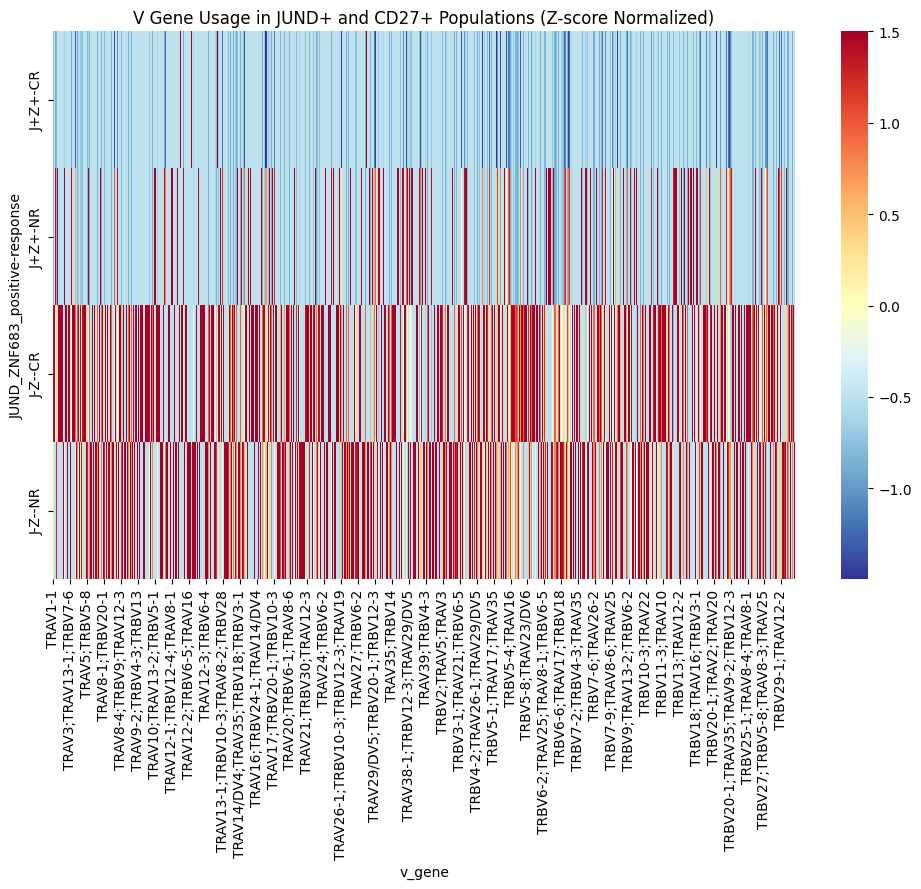

In [7]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load log-transformed dataset
adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD4'].copy()
adata_log_CR_NR = adata_log_CD4[adata_log_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load combat-corrected dataset for counts
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD4'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify JUND+ and ZNF683+ populations using log-transformed data
# Define primary genes for population classification
# primary_gene_1 = "DENND5A"
# primary_gene_2 = "CD27"
primary_gene_1 = "JUND"
primary_gene_2 = "ZNF683"

# Extract expression data for primary genes from adata_log_CR_NR
JUND_log = adata_log_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_log = adata_log_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_2].X.flatten()

# Define positive as expression >0
mask_JUND_positive = JUND_log > 0
mask_ZNF683_positive = ZNF683_log > 0
mask_JhZh = mask_JUND_positive & mask_ZNF683_positive

# Assign 'J+Z+' or 'J-Z-' based on mask to adata_combat_CR_NR
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_JhZh, 'J+Z+', 'J-Z-')
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')

# Calculate V gene frequency in JUND+ and JUND- cells


# Calculate V gene counts for each group
v_gene_counts = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response', 'v_gene']
).size().unstack(fill_value=0)

# Calculate the total number of cells in each group (D+CD+ CR, D+CD+ NR, etc.)
group_sizes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size()

# Normalize V gene counts by the total number of cells in each group
v_gene_counts_normalized = v_gene_counts.div(group_sizes, axis=0)

# Now, calculate the Z-scores of the normalized V gene frequencies
v_gene_counts_zscore = (v_gene_counts_normalized - v_gene_counts_normalized.mean()) / v_gene_counts_normalized.std()

# Plot the Z-score normalized data
plt.figure(figsize=(10, 9))
sns.heatmap(v_gene_counts_zscore, 
            cmap='RdYlBu_r', 
            annot=False,  # Show annotations if needed
            fmt=".2f")    # Use floating point format with 2 decimals
plt.title('V Gene Usage in JUND+ and CD27+ Populations (Z-score Normalized)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number of cells before subsetting: 23147
Number of cells after subsetting: 19826


/tmp/ipykernel_57784/1660785799.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  v_gene_counts = adata_combat_CR_NR.obs.groupby(


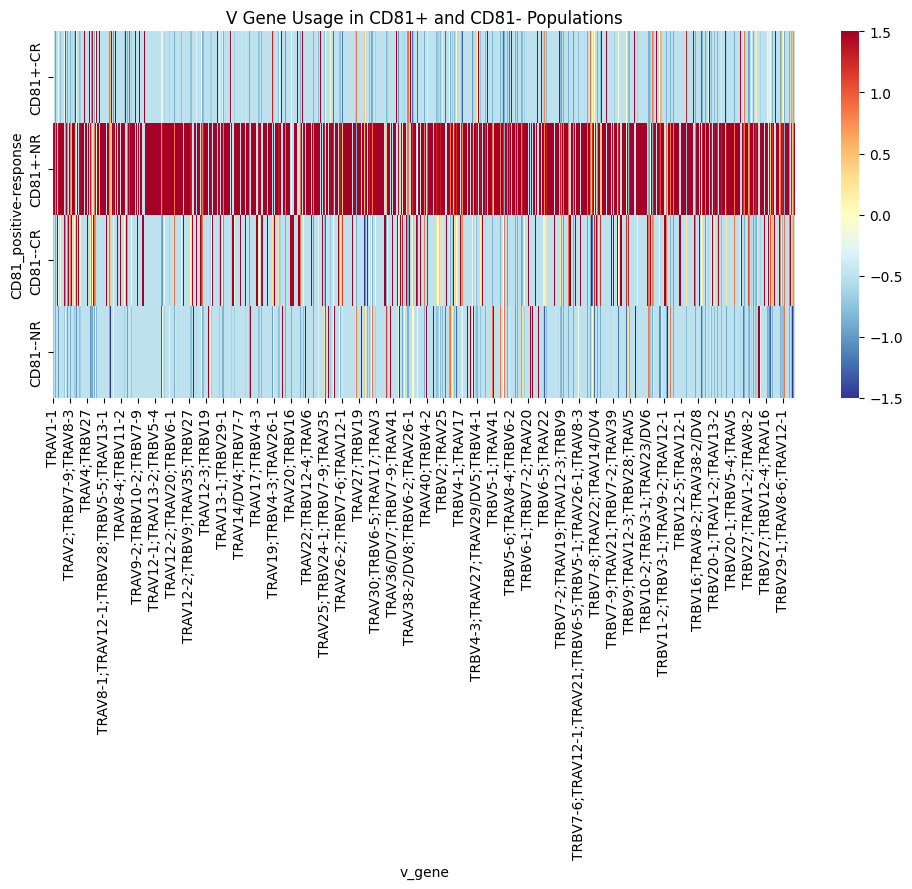

In [9]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# Load log-transformed dataset
adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD8'].copy()
adata_log_CR_NR = adata_log_CD4[adata_log_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load combat-corrected dataset for counts
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Define CD81 for analysis
primary_gene = "CD81"

# Extract expression data for CD81 from adata_log_CR_NR
CD81_log = adata_log_CR_NR[:, primary_gene].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene].X.flatten()

# Define positive as expression > 0
mask_CD81_positive = CD81_log > 0

# Assign 'CD81+' or 'CD81-' based on mask to adata_combat_CR_NR
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = np.where(mask_CD81_positive, 'CD81+', 'CD81-')
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive'].astype('category')

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')

# Calculate V gene frequency in CD81+ and CD81- cells

# Plot heatmap for V gene usage in CD81+ and CD81- populations
v_gene_counts = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene}_positive', 'response', 'v_gene']
).size().unstack(fill_value=0)

v_gene_counts_zscore = (v_gene_counts - v_gene_counts.mean()) / v_gene_counts.std()

# Plot the Z-score normalized data
plt.figure(figsize=(10, 9))
sns.heatmap(v_gene_counts_zscore, 
            cmap='RdYlBu_r', 
            annot=False,         # Show annotations
            fmt=".2f")           # Use floating point format with 2 decimals

plt.title(f'V Gene Usage in CD81+ and CD81- Populations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
pip install altair

  Obtaining dependency information for altair from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=3.0 from https://files.pythonhosted.org/packages/69/4a/4f9dbeb84e8850557c02365a0eee0649abe5eb1d84af92a25731c6c0f922/jsonschema-4.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.5.2 from https://files.pythonhosted.org/packages/7a/00/09319b042fe581c2911020f21dd2919d1677ee9a7bd0003a690b47217140/narwhals-1.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/ee/07/44bd408781594c4d0a027666ef27fab1e441b109dc3b76b4f836f8fd04fe/jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for referencing>=0.28.4 from https://files.pythonhosted.org/packages/b7/59/2056f61236782a2c86b33906

In [3]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

# Load the AnnData object
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_harmony_genovis.h5ad')

# Filter for Stanford organization
adata = adata[adata.obs['organization'] == 'Stanford']
print(f"Number of Stanford cells: {adata.shape[0]}")

# Load TCR metadata
tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')

# Calculate the CDR3 length from the 'cdr3' column
tcr_meta['cdr3_length'] = tcr_meta['cdr3'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Truncate barcodes to the first 16 characters in both datasets
tcr_meta['short_barcode'] = tcr_meta['barcode'].str[:16]
adata.obs['short_barcode'] = adata.obs_names.str[:16]

# Get the list of barcodes in adata
barcodes_in_adata = adata.obs['short_barcode'].unique()

# Filter tcr_meta to include only barcodes that are in adata
tcr_meta_filtered = tcr_meta[tcr_meta['short_barcode'].isin(barcodes_in_adata)].copy()

# Aggregate clonotype information per cell and ensure all values are strings
tcr_aggregated = tcr_meta_filtered.groupby('short_barcode').agg({
    'chain': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'v_gene': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'cdr3': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'cdr3_length': 'mean',
    'exact_subclonotype_id': lambda x: ';'.join(x.dropna().astype(str).unique()),
    'raw_clonotype_id': lambda x: ';'.join(x.dropna().astype(str).unique()),  # Include this line
}).reset_index()

# Rename 'raw_clonotype_id' to 'tcr_clonotype'
tcr_aggregated.rename(columns={'raw_clonotype_id': 'tcr_clonotype'}, inplace=True)

# Merge TCR data with adata.obs
adata.obs = adata.obs.merge(tcr_aggregated, on='short_barcode', how='left')
print(adata.obs.columns)  # Check if 'tcr_clonotype' is now in the DataFrame

# Save the modified AnnData object
adata.write_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_genovis_stanford_tcr.h5ad')

print("TCR metadata successfully merged and AnnData object saved.")

Number of Stanford cells: 39770


/tmp/ipykernel_18512/2019931211.py:14: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  tcr_meta = pd.read_csv('/home/emma/data/CART/TCR seq/concatenated_TCR_seq.csv')
/tmp/ipykernel_18512/2019931211.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['short_barcode'] = adata.obs_names.str[:16]


Index(['channel', 'barcode', 'timepoint', 'timepoint_fine', 'product',
       'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts',
       'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization',
       'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores',
       'predicted_doublets', 'n_counts', 'leiden_0.9', 'leiden_0.8',
       'leiden_0.7', 'leiden_0.6', 'leiden_0.5', 'leiden_0.4', 'leiden_0.3',
       'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4',
       'leiden_1.5', 'louvain', 'cluster_15', 'cell_type', 'category',
       'category_response', 'short_barcode', 'chain', 'v_gene', 'cdr3',
       'cdr3_length', 'exact_subclonotype_id', 'tcr_clonotype'],
      dtype='object')
TCR metadata successfully merged and AnnData object saved.


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/tmp/ipykernel_60717/176253950.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clonal_expansion = adata_combat_CR_NR.obs.grou

Index(['channel', 'barcode', 'timepoint', 'timepoint_fine', 'product',
       'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts',
       'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization',
       'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores',
       'predicted_doublets', 'n_counts', 'leiden_0.9', 'leiden_0.8',
       'leiden_0.7', 'leiden_0.6', 'leiden_0.5', 'leiden_0.4', 'leiden_0.3',
       'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4',
       'leiden_1.5', 'louvain', 'cluster_15', 'cell_type', 'category',
       'category_response', 'short_barcode', 'chain', 'v_gene', 'cdr3',
       'cdr3_length', 'exact_subclonotype_id', 'tcr_clonotype',
       'clonal_expansion', 'DENND5A_PECAM1_positive'],
      dtype='object')


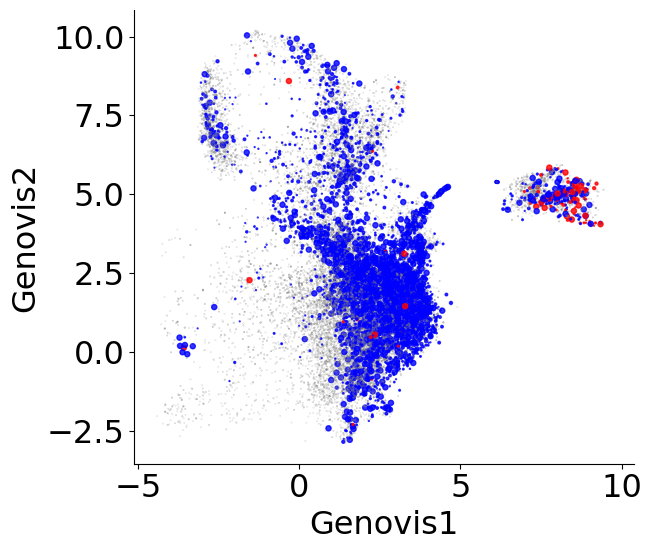

In [25]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load Genovis data and subset for CD4 cells and CR/NR responses
adata_genovis = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_genovis_stanford_tcr.h5ad')
adata_genovis_CD4 = adata_genovis[adata_genovis.obs['cell_type'] == 'CD8'].copy()
adata_genovis_CR_NR = adata_genovis_CD4[adata_genovis_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load the clonotype data for clonal expansion analysis
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD8'].copy()
#adata_log_CD4 = adata_log_CD4[adata_log_CD4.obs['leiden_0.9'].isin(['3', '6', '10', '11', '12', '13'])].copy()
adata_log_CR_NR = adata_log_CD4[(adata_log_CD4.obs['response'] == 'CR') | (adata_log_CD4.obs['response'] == 'NR')].copy()

# Find common barcodes
common_barcodes = adata_genovis_CR_NR.obs_names.intersection(adata_combat_CR_NR.obs_names)
adata_genovis_CR_NR = adata_genovis_CR_NR[common_barcodes].copy()
adata_combat_CR_NR = adata_combat_CR_NR[common_barcodes].copy()

# Calculate clonal expansion (percentage of clonally expanded cells)
clonal_expansion = adata_combat_CR_NR.obs.groupby('tcr_clonotype').size() / adata_combat_CR_NR.shape[0]
adata_combat_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['tcr_clonotype'].map(clonal_expansion)
adata_combat_CR_NR.obs['clonal_expansion'].fillna(0, inplace=True)

# Transfer the clonal expansion data to the Genovis dataset
adata_genovis_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['clonal_expansion']

# Define primary genes for population classification
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Make sure the population column is assigned correctly
primary_gene_1 = "DENND5A"
primary_gene_2 = "PECAM1"

# Extract expression data for primary genes
JUND_log = adata_log_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_log = adata_log_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene_2].X.flatten()

# Define positive as expression > 0
mask_JUND_positive = JUND_log > 0
mask_ZNF683_positive = ZNF683_log > 0
mask_JhZh = mask_JUND_positive & mask_ZNF683_positive

# Assign 'J+Z+' or 'J-Z-' based on the mask to the datasets
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_JhZh, 'J+Z+', 'J-Z-')
adata_genovis_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive']

# Check if the column has been correctly created
print(adata_genovis_CR_NR.obs.columns)

# Now apply the color mapping and plotting

# Custom colors for the populations
# Custom colors for the populations, but only apply to cells with clonal expansion
custom_colors = {'J+Z+': 'red', 'J-Z-': 'blue'}

# Create a column to assign colors: non-expansion cells will be grey
adata_genovis_CR_NR.obs['clonal_color'] = np.where(
    adata_genovis_CR_NR.obs['clonal_expansion'] > 0.001,  # Check if there's clonal expansion
    adata_genovis_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].map(custom_colors),  # Assign red/blue for clonal cells
    'grey'  # Grey for non-expansion cells
)
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['font.size'] = 23
# plt.rcParams['axes.linewidth'] = 2
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['xtick.major.width'] = 2
# plt.rcParams['ytick.major.width'] = 2

# Now plot the data using the flattened DataFrame
plt.figure(figsize=(7, 6))
plt.rcParams.update({'font.size': 23})  
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Now, plot the UMAP with clonal expansion cells in color and non-expansion cells in grey

# plt.figure(figsize=(8, 6))
# sc.pl.embedding(
#     adata_genovis_CR_NR, 
#     basis='X_genovis', 
#     color='clonal_expansion', 
#     cmap='Paired', 
#     size=50, 
#     title='Clonal Expansion in Genovis UMAP',
#     show=False
# )
# plt.show()
plt.scatter(
    adata_genovis_CR_NR.obsm['X_genovis'][:, 0], 
    adata_genovis_CR_NR.obsm['X_genovis'][:, 1], 
    c=adata_genovis_CR_NR.obs['clonal_color'],  # Use the updated color column
    s=adata_genovis_CR_NR.obs['clonal_expansion'] * 300,  # Adjust point size based on clonal expansion
    alpha=0.8  # Set transparency for better visualization
)

# Customize the plot
plt.xlabel('Genovis1')
plt.ylabel('Genovis2')
plt.title('')
plt.tight_layout()
plt.show()
# Create a custom legend
# from matplotlib.lines import Line2D

# Define custom legend entries
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', label='J+Z+ (Red)', markerfacecolor='red', markersize=15),
#     Line2D([0], [0], marker='o', color='w', label='J-Z- (Blue)', markerfacecolor='blue', markersize=15),
#     Line2D([0], [0], marker='o', color='w', label='Non-Clonal (Grey)', markerfacecolor='grey', markersize=15)
# ]

# # Add the legend to the plot
# plt.legend(handles=legend_elements, loc='upper right')

# # Adjust layout
# plt.tight_layout()
# plt.show()



/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/tmp/ipykernel_60717/2363019242.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clonal_expansion = adata_combat_CR_NR.obs.gro

Index(['channel', 'barcode', 'timepoint', 'timepoint_fine', 'product',
       'generic', 'nTisa', 'nAxi', 'CAR', 'n_genes_by_counts', 'total_counts',
       'response', 'cdr3_TRA', 'cdr3_TRB', 'batch_id', 'organization',
       'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores',
       'predicted_doublets', 'n_counts', 'leiden_0.9', 'leiden_0.8',
       'leiden_0.7', 'leiden_0.6', 'leiden_0.5', 'leiden_0.4', 'leiden_0.3',
       'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4',
       'leiden_1.5', 'louvain', 'cluster_15', 'cell_type', 'category',
       'category_response', 'short_barcode', 'chain', 'v_gene', 'cdr3',
       'cdr3_length', 'exact_subclonotype_id', 'tcr_clonotype',
       'clonal_expansion', 'CD81_positive'],
      dtype='object')


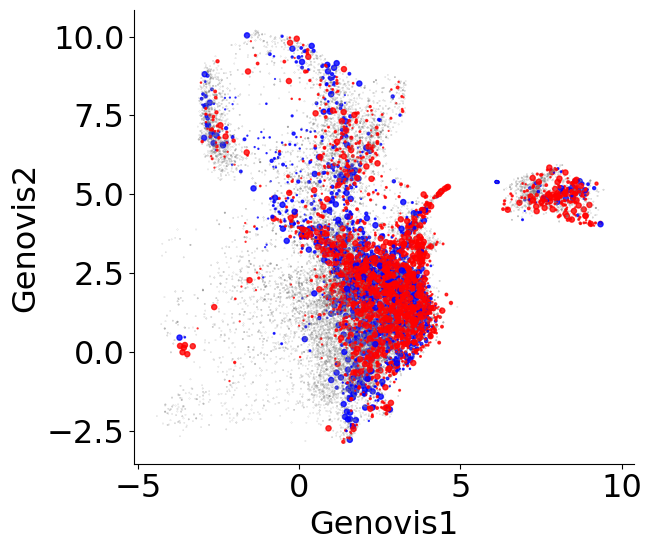

In [26]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load Genovis data and subset for CD4 cells and CR/NR responses
adata_genovis = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_genovis_stanford_tcr.h5ad')
adata_genovis_CD4 = adata_genovis[adata_genovis.obs['cell_type'] == 'CD8'].copy()
adata_genovis_CR_NR = adata_genovis_CD4[adata_genovis_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Load the clonotype data for clonal expansion analysis
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

adata_log = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log_stanford_tcr.h5ad')
adata_log_CD4 = adata_log[adata_log.obs['cell_type'] == 'CD8'].copy()
adata_log_CR_NR = adata_log_CD4[(adata_log_CD4.obs['response'] == 'CR') | (adata_log_CD4.obs['response'] == 'NR')].copy()

# Find common barcodes
common_barcodes = adata_genovis_CR_NR.obs_names.intersection(adata_combat_CR_NR.obs_names)
adata_genovis_CR_NR = adata_genovis_CR_NR[common_barcodes].copy()
adata_combat_CR_NR = adata_combat_CR_NR[common_barcodes].copy()

# Calculate clonal expansion (percentage of clonally expanded cells)
clonal_expansion = adata_combat_CR_NR.obs.groupby('tcr_clonotype').size() / adata_combat_CR_NR.shape[0]
adata_combat_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['tcr_clonotype'].map(clonal_expansion)
adata_combat_CR_NR.obs['clonal_expansion'].fillna(0, inplace=True)

# Transfer the clonal expansion data to the Genovis dataset
adata_genovis_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['clonal_expansion']

# Define the single gene (CD81) for population classification
primary_gene = "CD81"

# Extract expression data for CD81
CD81_log = adata_log_CR_NR[:, primary_gene].X.toarray().flatten() if issparse(adata_log_CR_NR.X) else adata_log_CR_NR[:, primary_gene].X.flatten()

# Define positive as expression > 0
mask_CD81_positive = CD81_log > 0

# Assign 'CD81+' or 'CD81-' based on the mask to the datasets
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = np.where(mask_CD81_positive, 'CD81+', 'CD81-')
adata_genovis_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive']

# Check if the column has been correctly created
print(adata_genovis_CR_NR.obs.columns)

# Now apply the color mapping and plotting

# Custom colors for the populations, but only apply to cells with clonal expansion
custom_colors = {'CD81+': 'red', 'CD81-': 'blue'}

# Create a column to assign colors: non-expansion cells will be grey
adata_genovis_CR_NR.obs['clonal_color'] = np.where(
    adata_genovis_CR_NR.obs['clonal_expansion'] > 0.001,  # Check if there's clonal expansion
    adata_genovis_CR_NR.obs[f'{primary_gene}_positive'].map(custom_colors),  # Assign red/blue for clonal cells
    'grey'  # Grey for non-expansion cells
)

# Now plot the data using the flattened DataFrame
plt.figure(figsize=(7, 6))
plt.rcParams.update({'font.size': 23})  
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot the UMAP with clonal expansion cells in color and non-expansion cells in grey
plt.scatter(
    adata_genovis_CR_NR.obsm['X_genovis'][:, 0], 
    adata_genovis_CR_NR.obsm['X_genovis'][:, 1], 
    c=adata_genovis_CR_NR.obs['clonal_color'],  # Use the updated color column
    s=adata_genovis_CR_NR.obs['clonal_expansion'] * 300,  # Adjust point size based on clonal expansion
    alpha=0.8  # Set transparency for better visualization
)

# Customize the plot
plt.xlabel('Genovis1')
plt.ylabel('Genovis2')
plt.title('')
plt.tight_layout()
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Genovis CR_NR barcodes sample: Index(['2', '31', '41', '52', '67'], dtype='object')
Combat CR_NR barcodes sample: Index(['2', '31', '41', '52', '67'], dtype='object')
Number of common barcodes: 23147
Number of cells after filtering for common barcodes: 23147
Clonal Expansion Data:
    clonal_expansion
2           0.000086
31          0.000130
41          0.000043
52          0.000086
67          0.045233
Clonal expansion statistics:
count    23147.000000
mean         0.002970
std          0.009593
min          0.000000
25%          0.000043
50%          0.000086
75%          0.000216
max          0.045233
Name: clonal_expansion, dtype: float64
Population Counts:
DENND5A_positive
DENND5A-    14073
DENND5A+     9074
Name: count, dtype: int64

Population Counts by Response:
DENND5A_positive  response
DENND5A+          CR           8378
                  NR            696
DENND5A-          CR              0
                  NR          14073
dtype: int64


/tmp/ipykernel_1402279/2201180408.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clonal_expansion = adata_combat_CR_NR.obs.groupby('tcr_clonotype').size() / adata_combat_CR_NR.shape[0]
/tmp/ipykernel_1402279/2201180408.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response']).size())


<Figure size 800x600 with 0 Axes>

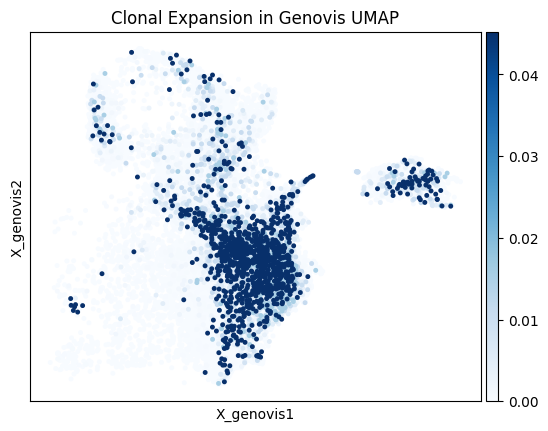

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

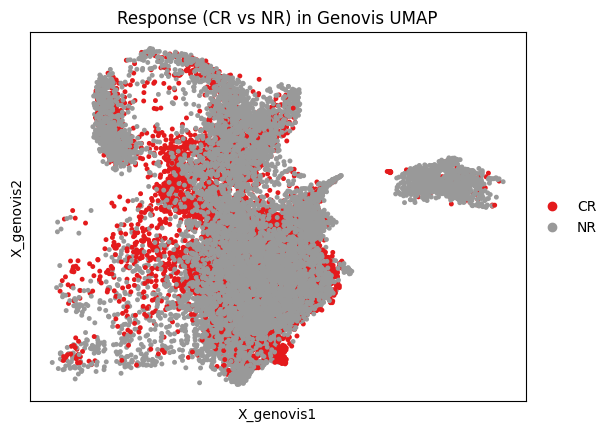

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

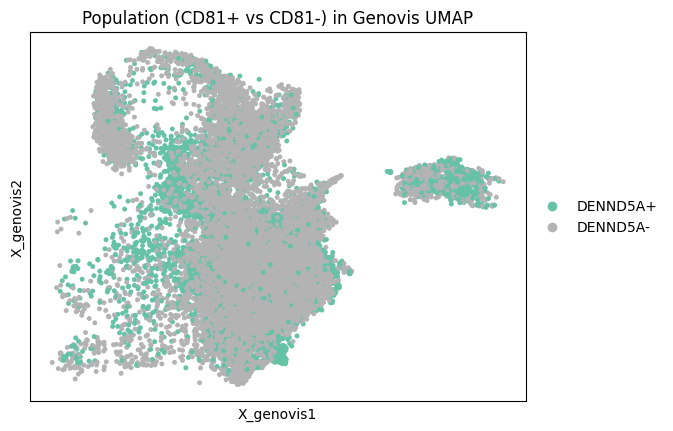

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

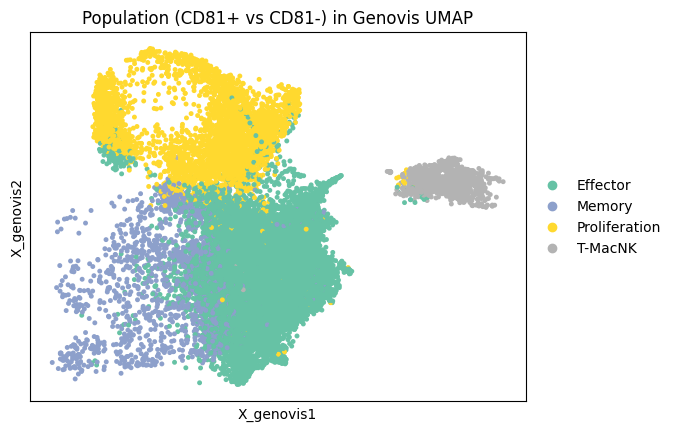

In [31]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load Genovis data and subset for CD8 cells and CR/NR responses
adata_genovis = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_genovis_stanford_tcr.h5ad')
adata_genovis_CD8 = adata_genovis[adata_genovis.obs['cell_type'] == 'CD8'].copy()
adata_genovis_CR_NR = adata_genovis_CD8[adata_genovis_CD8.obs['response'].isin(['CR', 'NR'])].copy()

# Load the clonotype data for clonal expansion analysis
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD8 = adata_combat[adata_combat.obs['cell_type'] == 'CD8'].copy()
adata_combat_CR_NR = adata_combat_CD8[adata_combat_CD8.obs['response'].isin(['CR', 'NR'])].copy()

# Check the barcodes in both datasets
print("Genovis CR_NR barcodes sample:", adata_genovis_CR_NR.obs_names[:5])
print("Combat CR_NR barcodes sample:", adata_combat_CR_NR.obs_names[:5])

# Find common barcodes
common_barcodes = adata_genovis_CR_NR.obs_names.intersection(adata_combat_CR_NR.obs_names)
print(f"Number of common barcodes: {len(common_barcodes)}")

# Filter both datasets to include only the common cells
adata_genovis_CR_NR = adata_genovis_CR_NR[common_barcodes].copy()
adata_combat_CR_NR = adata_combat_CR_NR[common_barcodes].copy()

print(f"Number of cells after filtering for common barcodes: {adata_genovis_CR_NR.obs.shape[0]}")

# Calculate clonal expansion (percentage of clonally expanded cells)
clonal_expansion = adata_combat_CR_NR.obs.groupby('tcr_clonotype').size() / adata_combat_CR_NR.shape[0]

# Map clonal expansion values back to individual cells in the dataset
adata_combat_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['tcr_clonotype'].map(clonal_expansion)

# Ensure that the 'clonal_expansion' column is filled with 0 for cells without clonotypes
adata_combat_CR_NR.obs['clonal_expansion'].fillna(0, inplace=True)

# Transfer the clonal expansion data to the Genovis dataset
adata_genovis_CR_NR.obs['clonal_expansion'] = adata_combat_CR_NR.obs['clonal_expansion']

# Verify if the clonal expansion data has been transferred correctly
print("Clonal Expansion Data:")
print(adata_genovis_CR_NR.obs[['clonal_expansion']].head())
print("Clonal expansion statistics:")
print(adata_genovis_CR_NR.obs['clonal_expansion'].describe())

# Define the primary gene (CD81) for population labeling
primary_gene = "DENND5A"

# Calculate the 25% quantile of CD81 expression
CD81_CR_NR = adata_combat_CR_NR[:, primary_gene].X.toarray().flatten() if issparse(adata_combat_CR_NR.X) else adata_combat_CR_NR[:, primary_gene].X.flatten()

mask_CD81_positive_25perct = np.quantile(CD81_CR_NR, 0.25)

# Identify CD81+ populations
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = np.where(CD81_CR_NR > mask_CD81_positive_25perct, f'{primary_gene}+', f'{primary_gene}-')
adata_combat_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive'].astype('category')

# Transfer the population labels to Genovis dataset
adata_genovis_CR_NR.obs[f'{primary_gene}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene}_positive']

# Check counts before subsetting
print("Population Counts:")
print(adata_combat_CR_NR.obs[f'{primary_gene}_positive'].value_counts())

# Check for CR and NR responses within each population
print("\nPopulation Counts by Response:")
print(adata_combat_CR_NR.obs.groupby([f'{primary_gene}_positive', 'response']).size())

# Plot the UMAP with clonal expansion represented by color
plt.figure(figsize=(8, 6))
sc.pl.embedding(
    adata_genovis_CR_NR, 
    basis='X_genovis', 
    color='clonal_expansion', 
    cmap='Blues', 
    size=50, 
    title='Clonal Expansion in Genovis UMAP',
    show=False
)
plt.show()

# Plot the UMAP colored by response (CR vs NR)
plt.figure(figsize=(8, 6))
sc.pl.embedding(
    adata_genovis_CR_NR, 
    basis='X_genovis', 
    color='response', 
    palette='Set1', 
    size=50, 
    title='Response (CR vs NR) in Genovis UMAP',
    show=False
)
plt.show()

# Plot the UMAP colored by CD81 population (CD81+ vs CD81-)
plt.figure(figsize=(8, 6))
sc.pl.embedding(
    adata_genovis_CR_NR, 
    basis='X_genovis', 
    color=f'{primary_gene}_positive', 
    palette='Set2', 
    size=50, 
    title='Population (CD81+ vs CD81-) in Genovis UMAP',
    show=False
)
plt.show()

# Plot the UMAP colored by CD81 population (CD81+ vs CD81-)
plt.figure(figsize=(8, 6))
sc.pl.embedding(
    adata_genovis_CR_NR, 
    basis='X_genovis', 
    color='category', 
    palette='Set2', 
    size=50, 
    title='Population (CD81+ vs CD81-) in Genovis UMAP',
    show=False
)
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Before Subsetting
JUND_ZNF683_positive
F-Z-    11598
F+Z+     5025
Name: count, dtype: int64

Population Counts by Response:
JUND_ZNF683_positive  response
F+Z+                  CR          2355
                      NR          2670
F-Z-                  CR          5168
                      NR          6430
dtype: int64
Number of cells before subsetting: 16623


/tmp/ipykernel_1437382/2755329915.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size())


Number of cells after subsetting: 14760


/tmp/ipykernel_1437382/2755329915.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


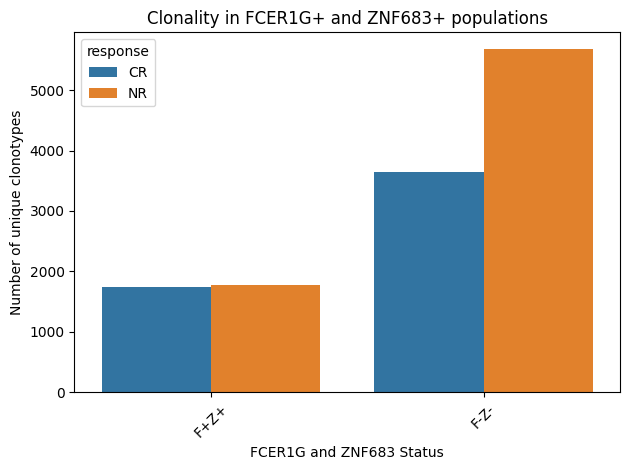

/tmp/ipykernel_1437382/2755329915.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(


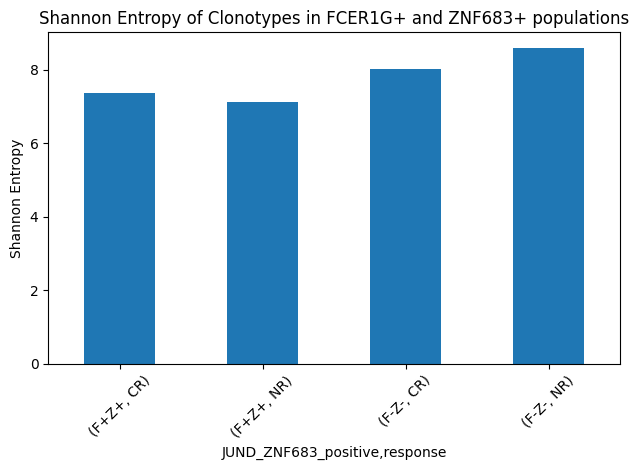

/tmp/ipykernel_1437382/2755329915.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  v_gene_counts = adata_combat_CR_NR.obs.groupby(
/tmp/ipykernel_1437382/2755329915.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_gene_counts_top['Group'] = (


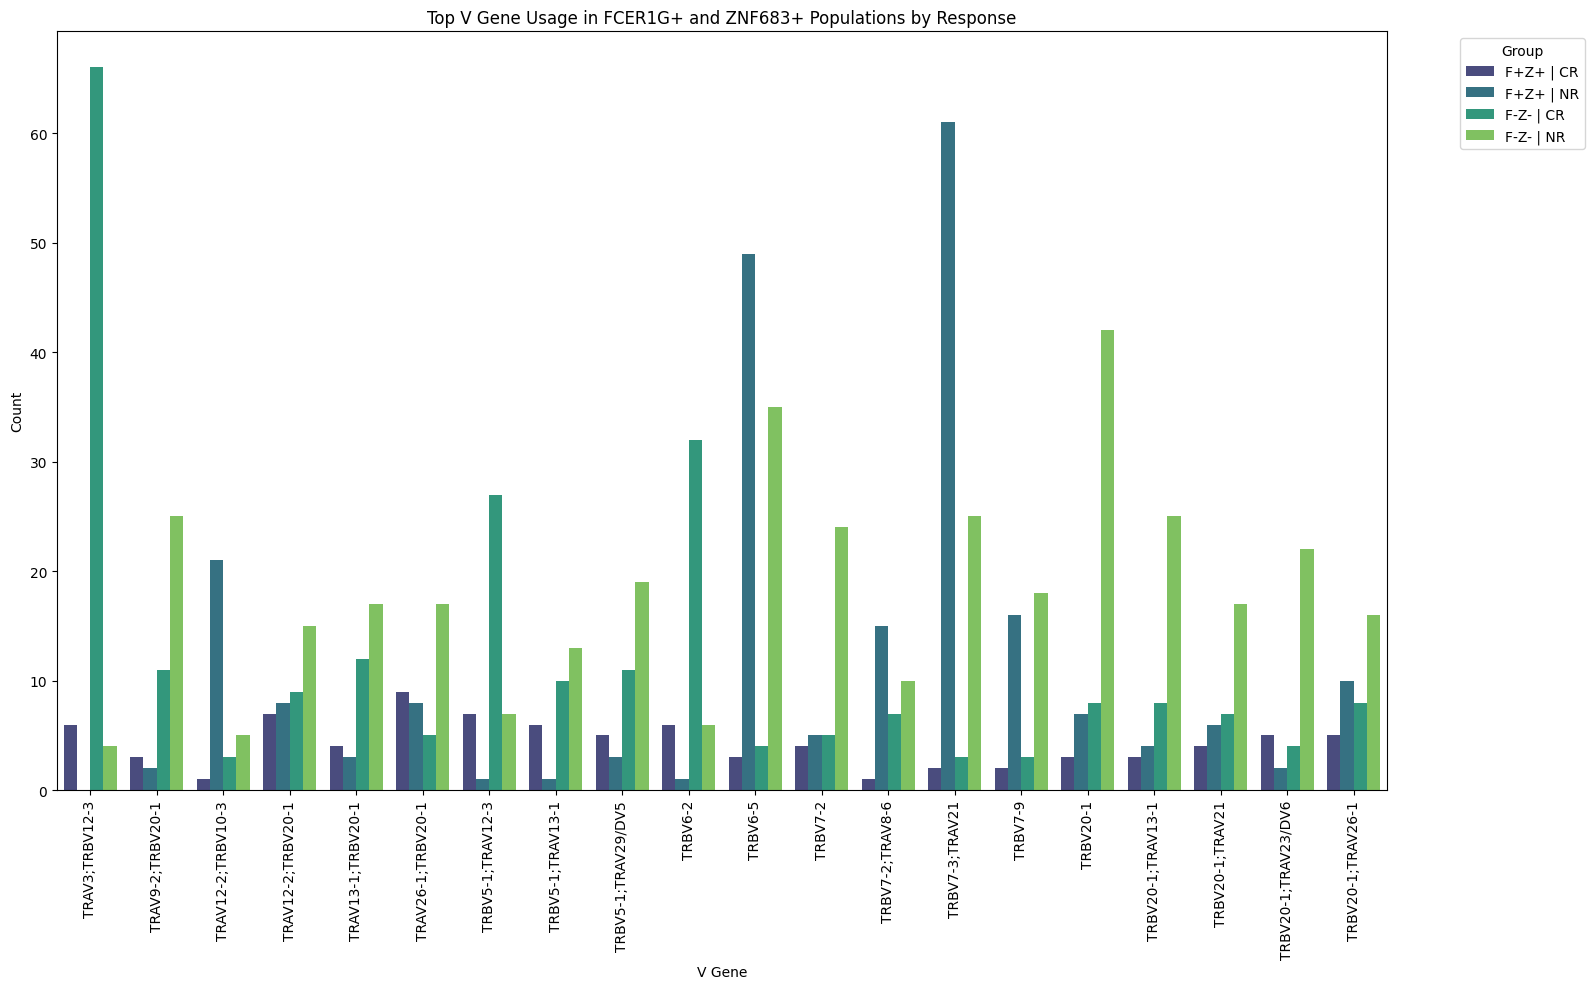

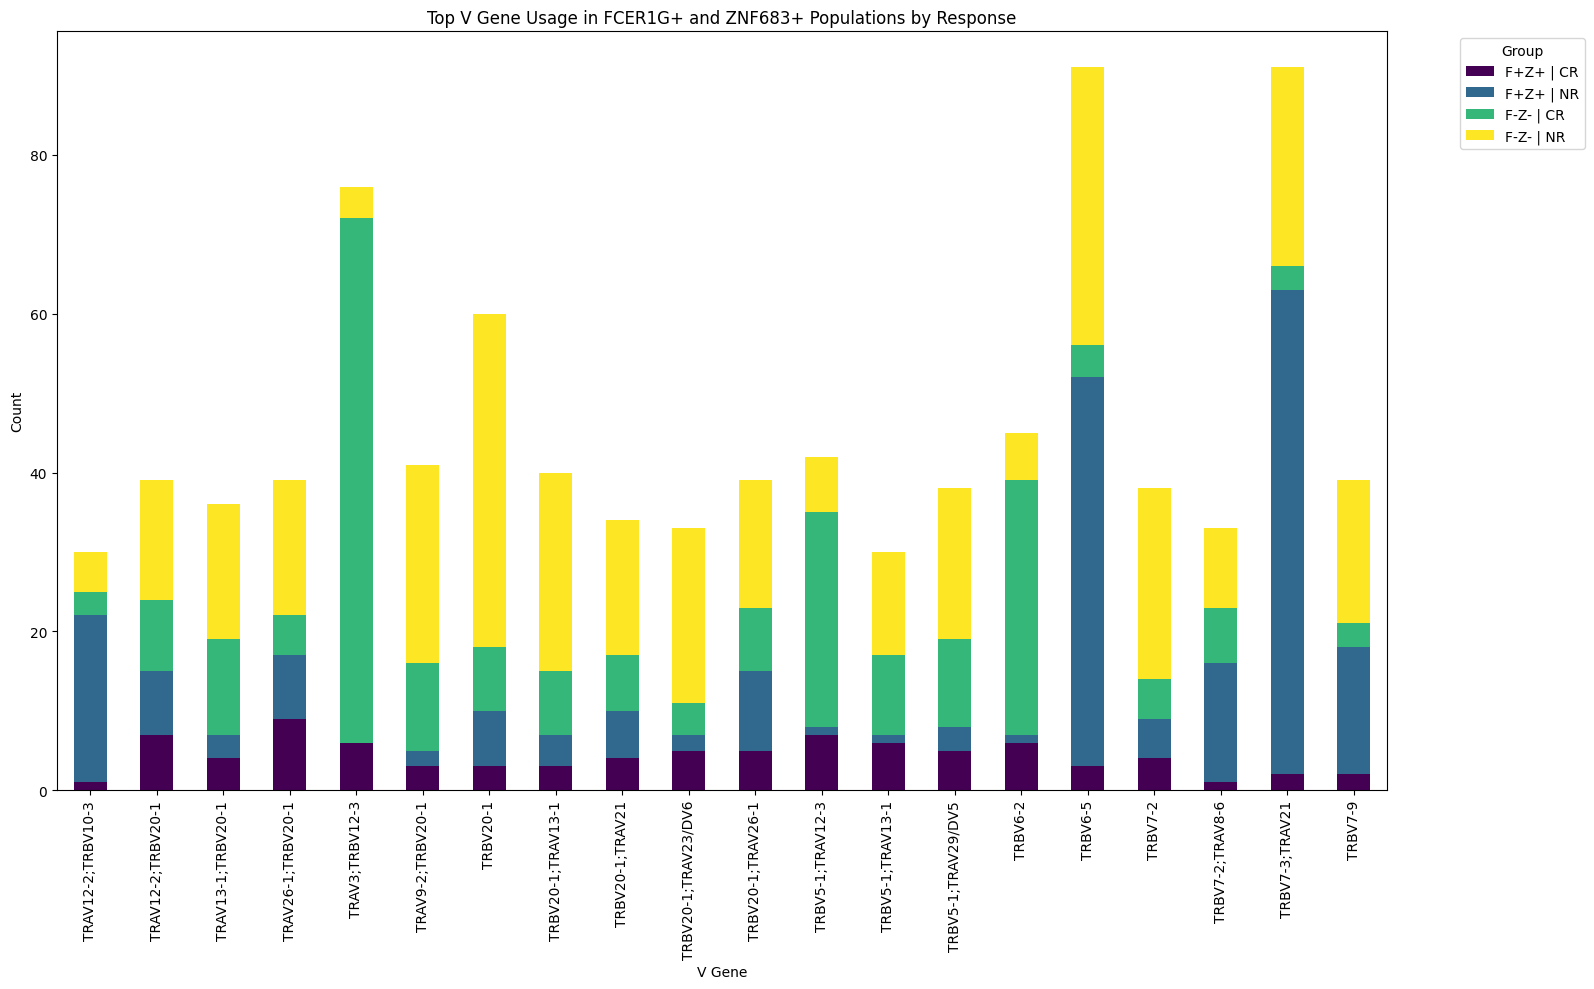

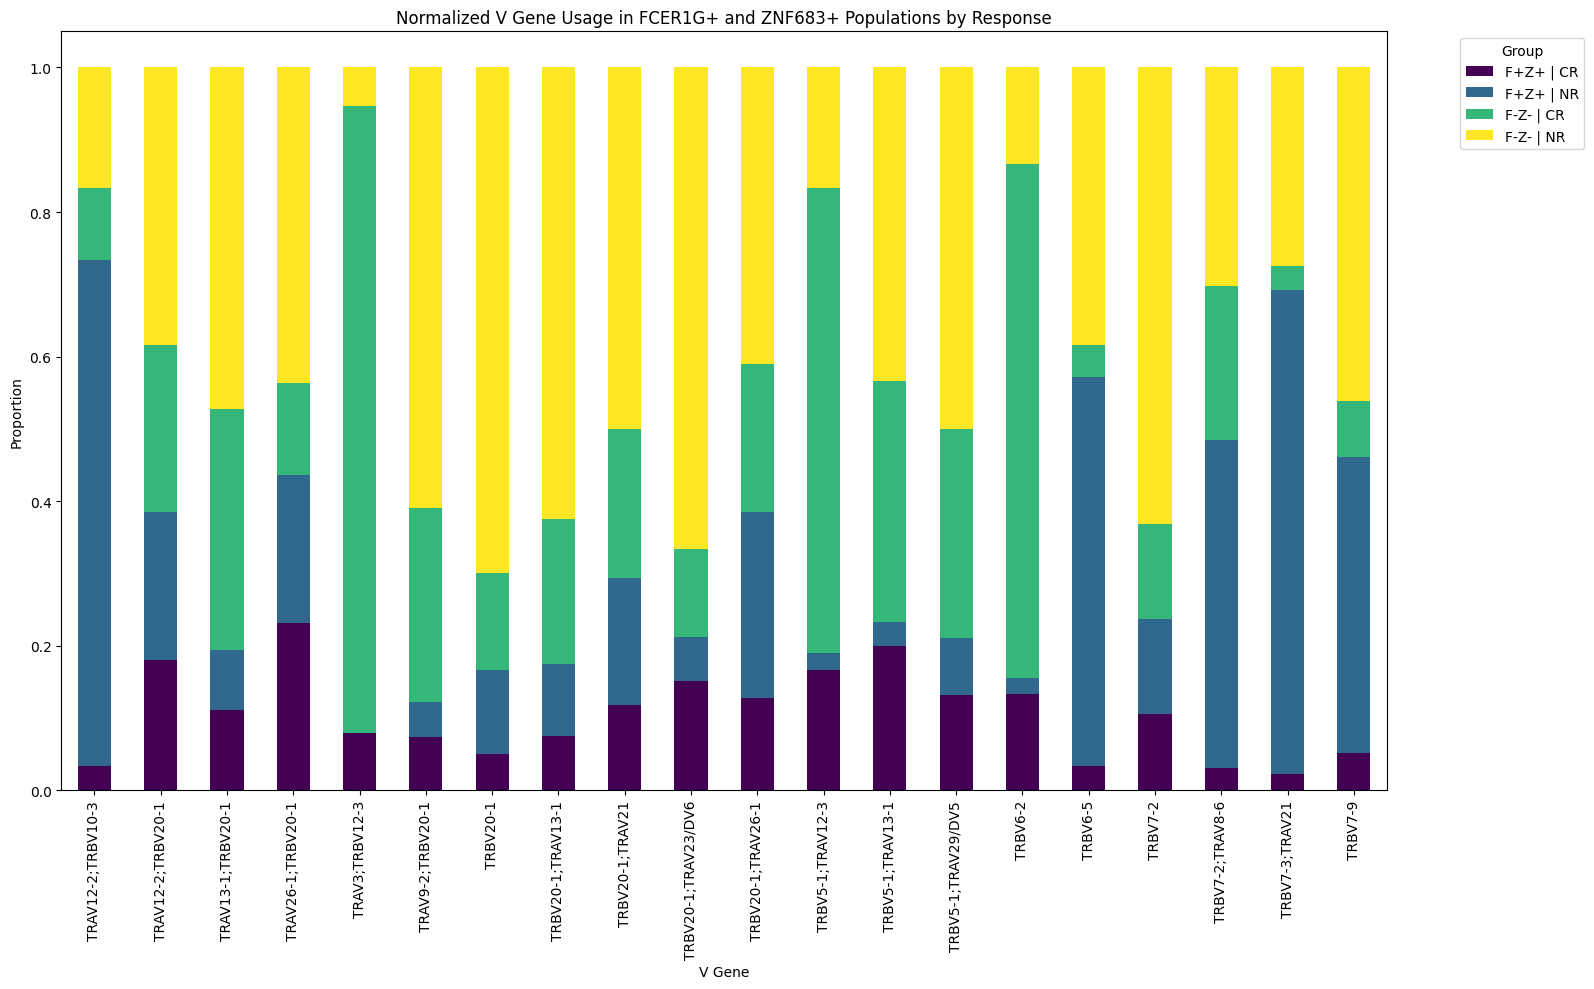

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


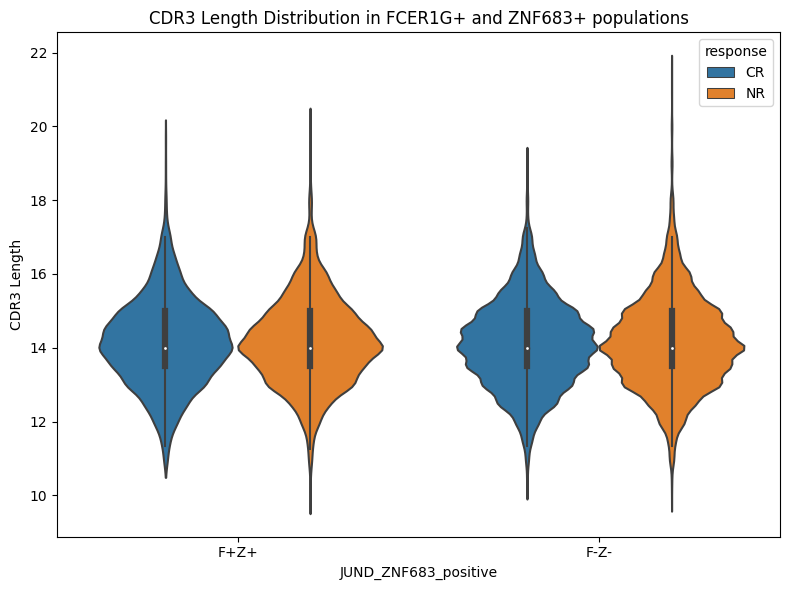

In [8]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load data and subset for CD4 cells and CR/NR responses
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD4'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify FCER1G+ and ZNF683+ populations using log-transformed data
primary_gene_1 = "JUND"
primary_gene_2 = "ZNF683"

# Calculate the 25% quantile of both genes' expression
FCER1G_CR_NR = adata_combat_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_combat_CR_NR.X) else adata_combat_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_CR_NR = adata_combat_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_combat_CR_NR.X) else adata_combat_CR_NR[:, primary_gene_2].X.flatten()

mask_FCER1G_positive_25perct = np.quantile(FCER1G_CR_NR, 0.25)
mask_ZNF683_positive_25perct = np.quantile(ZNF683_CR_NR, 0.25)

# Identify FCER1G+ ZNF683+ populations
mask_FCER1G_ZNF683_positive = (FCER1G_CR_NR > mask_FCER1G_positive_25perct) & (ZNF683_CR_NR > mask_ZNF683_positive_25perct)
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_FCER1G_ZNF683_positive, 'F+Z+', 'F-Z-')
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].astype('category')

# Check counts before subsetting
print("Before Subsetting")
print(adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].value_counts())

# Check for CR and NR responses within each population
print("\nPopulation Counts by Response:")
print(adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size())

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')

# Count the number of unique clonotypes in FCER1G+ and ZNF683+ populations
clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
clonotypes_df = clonotypes.reset_index()

# Plot the data using the flattened DataFrame
sns.barplot(x=clonotypes_df[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=clonotypes_df['tcr_clonotype'], 
            hue=clonotypes_df['response'])

plt.title('Clonality in FCER1G+ and ZNF683+ populations')
plt.xlabel('FCER1G and ZNF683 Status')
plt.ylabel('Number of unique clonotypes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()
    return entropy(clonotype_counts)

# Calculate Shannon entropy for FCER1G+ and ZNF683+ populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response']
).apply(calculate_shannon_entropy)

# Plot Shannon entropy
shannon_entropy.plot(kind='bar', title='Shannon Entropy of Clonotypes in FCER1G+ and ZNF683+ populations')
plt.ylabel('Shannon Entropy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate V gene frequency in FCER1G+ and ZNF683+ cells
v_gene_counts = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response', 'v_gene']
).size().unstack(fill_value=0)

# Convert to long format for seaborn plotting
v_gene_counts_long = v_gene_counts.reset_index().melt(id_vars=[f'{primary_gene_1}_{primary_gene_2}_positive', 'response'], 
                                                     var_name='v_gene', value_name='count')

# Optionally, focus on top N V genes to improve clarity
top_n = 20  # Adjust as needed
top_v_genes = v_gene_counts_long.groupby('v_gene')['count'].sum().nlargest(top_n).index
v_gene_counts_top = v_gene_counts_long[v_gene_counts_long['v_gene'].isin(top_v_genes)]

# Create a combined category for plotting by converting categorical columns to strings
v_gene_counts_top['Group'] = (
    v_gene_counts_top[f'{primary_gene_1}_{primary_gene_2}_positive']
    .astype(str) + ' | ' + v_gene_counts_top['response'].astype(str)
)

# Plotting Grouped Bar Plot
plt.figure(figsize=(16, 10))
sns.barplot(
    data=v_gene_counts_top,
    x='v_gene',
    y='count',
    hue='Group',
    palette='viridis'
)
plt.title('Top V Gene Usage in FCER1G+ and ZNF683+ Populations by Response')
plt.xlabel('V Gene')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Alternatively, Plotting Stacked Bar Plot
v_gene_pivot = v_gene_counts_top.pivot_table(
    index='v_gene',
    columns='Group',
    values='count',
    fill_value=0
)

v_gene_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='viridis'
)

plt.title('Top V Gene Usage in FCER1G+ and ZNF683+ Populations by Response')
plt.xlabel('V Gene')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Normalized Stacked Bar Plot
v_gene_pivot_normalized = v_gene_pivot.div(v_gene_pivot.sum(axis=1), axis=0)

v_gene_pivot_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='viridis'
)

plt.title('Normalized V Gene Usage in FCER1G+ and ZNF683+ Populations by Response')
plt.xlabel('V Gene')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Violin plot for CDR3 length distribution in FCER1G+ and ZNF683+ populations
plt.figure(figsize=(8, 6))
sns.violinplot(
    x=f'{primary_gene_1}_{primary_gene_2}_positive',
    y='cdr3_length',
    hue='response',
    data=adata_combat_CR_NR.obs
)
plt.title('CDR3 Length Distribution in FCER1G+ and ZNF683+ populations')
plt.ylabel('CDR3 Length')
plt.tight_layout()
plt.show()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Before Subsetting
JUND_ZNF683_positive
F-Z-    11598
F+Z+     5025
Name: count, dtype: int64

Population Counts by Response:
JUND_ZNF683_positive  response
F+Z+                  CR          2355
                      NR          2670
F-Z-                  CR          5168
                      NR          6430
dtype: int64
Number of cells before subsetting: 16623


/tmp/ipykernel_1437382/2060068208.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size())


Number of cells after subsetting: 14760


/tmp/ipykernel_1437382/2060068208.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


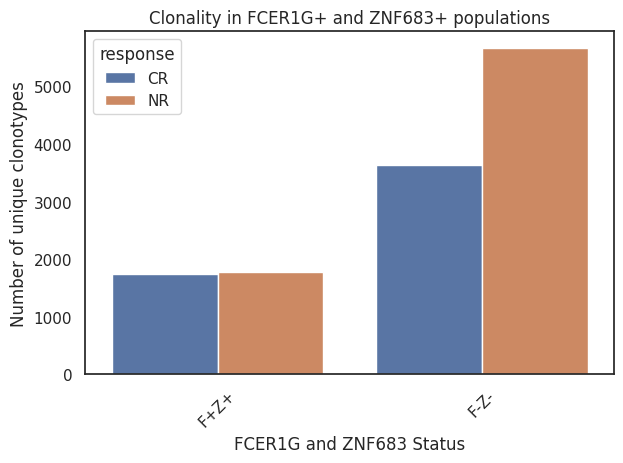

/tmp/ipykernel_1437382/2060068208.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shannon_entropy = adata_combat_CR_NR.obs.groupby(


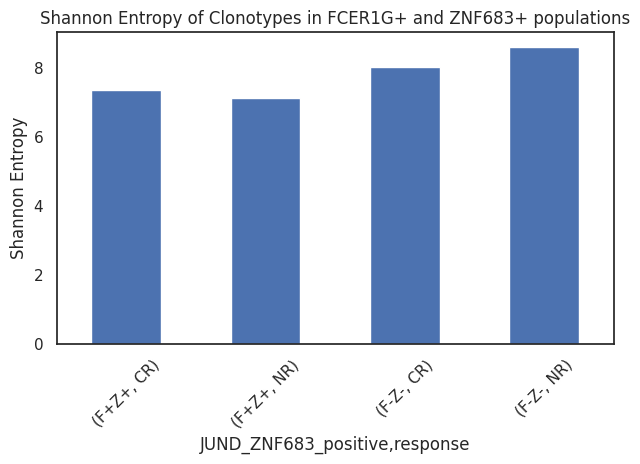

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import entropy

# Load data and subset for CD4 cells and CR/NR responses
adata_combat = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_stanford_tcr.h5ad')
adata_combat_CD4 = adata_combat[adata_combat.obs['cell_type'] == 'CD4'].copy()
adata_combat_CR_NR = adata_combat_CD4[adata_combat_CD4.obs['response'].isin(['CR', 'NR'])].copy()

# Identify FCER1G+ and ZNF683+ populations using log-transformed data
primary_gene_1 = "JUND"
primary_gene_2 = "ZNF683"

# Calculate the 25% quantile of both genes' expression
FCER1G_CR_NR = adata_combat_CR_NR[:, primary_gene_1].X.toarray().flatten() if issparse(adata_combat_CR_NR.X) else adata_combat_CR_NR[:, primary_gene_1].X.flatten()
ZNF683_CR_NR = adata_combat_CR_NR[:, primary_gene_2].X.toarray().flatten() if issparse(adata_combat_CR_NR.X) else adata_combat_CR_NR[:, primary_gene_2].X.flatten()

mask_FCER1G_positive_25perct = np.quantile(FCER1G_CR_NR, 0.25)
mask_ZNF683_positive_25perct = np.quantile(ZNF683_CR_NR, 0.25)

# Identify FCER1G+ ZNF683+ populations
mask_FCER1G_ZNF683_positive = (FCER1G_CR_NR > mask_FCER1G_positive_25perct) & (ZNF683_CR_NR > mask_ZNF683_positive_25perct)
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = np.where(mask_FCER1G_ZNF683_positive, 'F+Z+', 'F-Z-')
adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'] = adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].astype('category')

# Check counts before subsetting
print("Before Subsetting")
print(adata_combat_CR_NR.obs[f'{primary_gene_1}_{primary_gene_2}_positive'].value_counts())

# Check for CR and NR responses within each population
print("\nPopulation Counts by Response:")
print(adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response']).size())

# Check the number of cells before subsetting
print(f"Number of cells before subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Identify cells with non-missing TCR information
valid_cells = adata_combat_CR_NR.obs.dropna(subset=['tcr_clonotype', 'v_gene', 'cdr3_length']).index

# Subset the AnnData object to include only these cells
adata_combat_CR_NR = adata_combat_CR_NR[valid_cells].copy()

# Check the number of cells after subsetting
print(f"Number of cells after subsetting: {adata_combat_CR_NR.obs.shape[0]}")

# Ensure relevant columns are properly typed
adata_combat_CR_NR.obs['response'] = adata_combat_CR_NR.obs['response'].astype('category')
adata_combat_CR_NR.obs['tcr_clonotype'] = adata_combat_CR_NR.obs['tcr_clonotype'].astype('category')
adata_combat_CR_NR.obs['v_gene'] = adata_combat_CR_NR.obs['v_gene'].astype('category')

# Count the number of unique clonotypes in FCER1G+ and ZNF683+ populations
clonotypes = adata_combat_CR_NR.obs.groupby([f'{primary_gene_1}_{primary_gene_2}_positive', 'response'])['tcr_clonotype'].nunique()

# Convert the MultiIndex to a regular DataFrame for plotting
clonotypes_df = clonotypes.reset_index()

# Plot the data using the flattened DataFrame
sns.barplot(x=clonotypes_df[f'{primary_gene_1}_{primary_gene_2}_positive'], 
            y=clonotypes_df['tcr_clonotype'], 
            hue=clonotypes_df['response'])

plt.title('Clonality in FCER1G+ and ZNF683+ populations')
plt.xlabel('FCER1G and ZNF683 Status')
plt.ylabel('Number of unique clonotypes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to calculate Shannon entropy
def calculate_shannon_entropy(data):
    clonotype_counts = data['tcr_clonotype'].value_counts()
    return entropy(clonotype_counts)

# Calculate Shannon entropy for FCER1G+ and ZNF683+ populations
shannon_entropy = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response']
).apply(calculate_shannon_entropy)

# Plot Shannon entropy
shannon_entropy.plot(kind='bar', title='Shannon Entropy of Clonotypes in FCER1G+ and ZNF683+ populations')
plt.ylabel('Shannon Entropy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculate V gene frequency in FCER1G+ and ZNF683+ cells
v_gene_counts = adata_combat_CR_NR.obs.groupby(
    [f'{primary_gene_1}_{primary_gene_2}_positive', 'response', 'v_gene']
).size().reset_index(name='count')

# Optionally, focus on top N V genes to improve clarity
top_n = 20  # Adjust as needed
top_v_genes = v_gene_counts.groupby('v_gene')['count'].sum().nlargest(top_n).index
v_gene_counts_top = v_gene_counts[v_gene_counts['v_gene'].isin(top_v_genes)]

# Create a combined category for plotting by converting categorical columns to strings
v_gene_counts_top['Group'] = (
    v_gene_counts_top[f'{primary_gene_1}_{primary_gene_2}_positive']
    .astype(str) + ' | ' + v_gene_counts_top['response'].astype(str)
)

# Pivot the data to have V genes as rows and Groups as columns
v_gene_pivot = v_gene_counts_top.pivot_table(
    index='v_gene',
    columns='Group',
    values='count',
    fill_value=0
)

# Optional: Sort V genes by total count descending
sorted_v_genes = v_gene_pivot.sum(axis=1).sort_values(ascending=False).index
v_gene_pivot = v_gene_pivot.loc[sorted_v_genes]

# Create the heatmap
sns.set(style="white")
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    v_gene_pivot,
    cmap='viridis',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='d',  # Use '.2f' for normalized heatmap
    cbar_kws={'label': 'Count'},
    square=False,
    robust=True
)
plt.title('V Gene Usage in FCER1G+ and ZNF683+ Populations by Response', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('V Gene', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Plot normalized heatmap
v_gene_pivot_normalized = v_gene_pivot.div(v_gene_pivot.sum(axis=1), axis=0)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    v_gene_pivot_normalized,
    cmap='viridis',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Proportion'},
    square=False,
    robust=True
)
plt.title('Normalized V Gene Usage in FCER1G+ and ZNF683+ Populations by Response', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('V Gene', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

import plotly.express as px

fig = px.imshow(
    v_gene_pivot,
    labels=dict(x="Group", y="V Gene", color="Count"),
    x=v_gene_pivot.columns,
    y=v_gene_pivot.index,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    title='Interactive V Gene Usage Heatmap',
    xaxis_title='Group',
    yaxis_title='V Gene',
    width=900,
    height=700
)

fig.show()

